## First look at SCAM runs with CLASP modifications input by John T. 
<br>

In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib.animation as animation
import matplotlib as matplotlib

# Analysis
import os
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
#import regionmask
import pickle
import scipy.stats as stats
import glob
import Ngl
import Nio 


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [241]:
# Files 
#dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/2minCoupling/'
dataDir  = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/'
dirNoMom = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/HMG_noMomentsPrescribed/'

hmg_startFile = dataDir+'FSCAM.T42_T42.arm97.clasp_hmg_startDay'
htg_startFile = dataDir+'FSCAM.T42_T42.arm97.clasp_htg_startDay'
noMom_startFile = dirNoMom+'FSCAM.T42_T42.arm97.clasp_hmg_noMoments_startDay'

middleFile    = '_V2.cam.h0.2015-' # Default 20 min coupling
noMom_middle  = '.cam.h0.2015-'
#middleFile    = '.cam.h0.2015-'     # 2 min coupling
endFile       = '-00000.nc'

# Set up months/days for each file name/start
months = np.ones(31)*6
months[0] = 5
months = np.append(months,7)

days = np.arange(0,31)
days[0] = 31
days = np.append(days,1)

for iDay in range(30):
    
    hmgFile   = hmg_startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile
    htgFile   = htg_startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile
    noMomFile = noMom_startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+noMom_middle+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile
    
    with xr.open_dataset(hmgFile, decode_times=True) as hmg_DS:
        hmg_DS['time']  = hmg_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_hmg  = pd.DatetimeIndex(hmg_DS['time'].values)
        iTimeStart = np.where((times_hmg.day==days[iDay+1]) & (times_hmg.hour==6))[0]
        iTimeEnd   = np.where((times_hmg.day==days[iDay+2]) & (times_hmg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            hmgDS = hmg_DS.isel(time=iTimeRange)
        else:
            hmgDS = xr.concat([hmgDS,hmg_DS.isel(time=iTimeRange)], dim='time')
            
    # Read in filed with heterogeneous surface forcing prescribed     
    with xr.open_dataset(htgFile, decode_times=True) as htg_DS:
        htg_DS['time']  = htg_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_htg  = pd.DatetimeIndex(htg_DS['time'].values)
        iTimeStart = np.where((times_htg.day==days[iDay+1]) & (times_htg.hour==6))[0]
        iTimeEnd   = np.where((times_htg.day==days[iDay+2]) & (times_htg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            htgDS = htg_DS.isel(time=iTimeRange)
        else:
            htgDS = xr.concat([htgDS,htg_DS.isel(time=iTimeRange)], dim='time')
    
    # Read in files with no moments prescribed 
    with xr.open_dataset(noMomFile, decode_times=True) as noMom_DS:
        noMom_DS['time']  = noMom_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_noMom = pd.DatetimeIndex(noMom_DS['time'].values)
        iTimeStart  = np.where((times_noMom.day==days[iDay+1]) & (times_noMom.hour==6))[0]
        iTimeEnd    = np.where((times_noMom.day==days[iDay+2]) & (times_noMom.hour==6))[0]
        iTimeRange  = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            noMomDS = noMom_DS.isel(time=iTimeRange)
        else:
            noMomDS = xr.concat([noMomDS,noMom_DS.isel(time=iTimeRange)], dim='time')
            
    print('Done with day %i' % iDay)
            

Done with day 0
Done with day 1
Done with day 2
Done with day 3
Done with day 4
Done with day 5
Done with day 6
Done with day 7
Done with day 8
Done with day 9
Done with day 10
Done with day 11
Done with day 12
Done with day 13
Done with day 14
Done with day 15
Done with day 16
Done with day 17
Done with day 18
Done with day 19
Done with day 20
Done with day 21
Done with day 22
Done with day 23
Done with day 24
Done with day 25
Done with day 26
Done with day 27
Done with day 28
Done with day 29


In [242]:
timesHTG   = pd.DatetimeIndex(htgDS.time.values)
timesHMG   = pd.DatetimeIndex(hmgDS.time.values)
timesNoMom = pd.DatetimeIndex(noMomDS.time.values)


In [5]:
# # Compare against simulations that ran the whole month, being initialized just once 
# fileHTG = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/2minCoupling/FSCAM.T42_T42.arm97.clasp_htg_fullMonth.cam.h0.2015-05-31-00000.nc'
# fileHMG = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/2minCoupling/FSCAM.T42_T42.arm97.clasp_hmg_fullMonth.cam.h0.2015-05-31-00000.nc'

# monHTG_ds = xr.open_dataset(fileHTG,decode_times=True)
# monHTG_ds['time']  = monHTG_ds.indexes['time'].to_datetimeindex()
# timeHTG_mon = pd.DatetimeIndex(monHTG_ds.time.values)

# monHMG_ds = xr.open_dataset(fileHMG,decode_times=True)
# monHMG_ds['time']  = monHMG_ds.indexes['time'].to_datetimeindex()
# timeHMG_mon = pd.DatetimeIndex(monHMG_ds.time.values)


## Make some plots

Text(0.5, 1.0, 'THLP2_CLUBB')

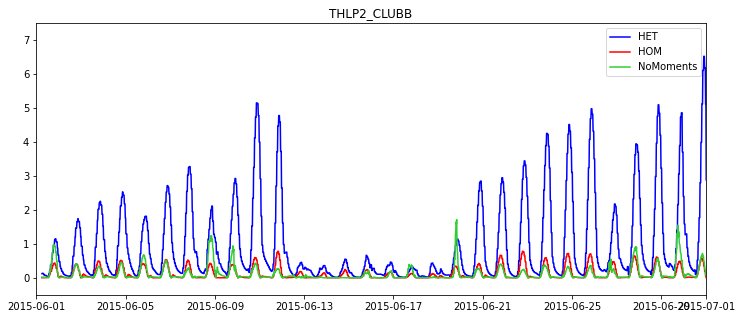

In [11]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
                     facecolor='w', edgecolor='k')


ax1.plot(timesHTG,np.squeeze(htgDS.THLP2_CLUBB.values)[:,-1],'b',label='HET')
ax1.plot(timesHMG,np.squeeze(hmgDS.THLP2_CLUBB.values)[:,-1],'r',label='HOM')
ax1.plot(timesNoMom,np.squeeze(noMomDS.THLP2_CLUBB.values)[:,-1],'limegreen',label='NoMoments')
ax1.legend()
ax1.set_ylim([-0.5,7.5])
ax1.set_xlim(datetime.date(2015,6,1), datetime.date(2015,7,1))
ax1.set_title('THLP2_CLUBB')

(735750.0, 735780.0)

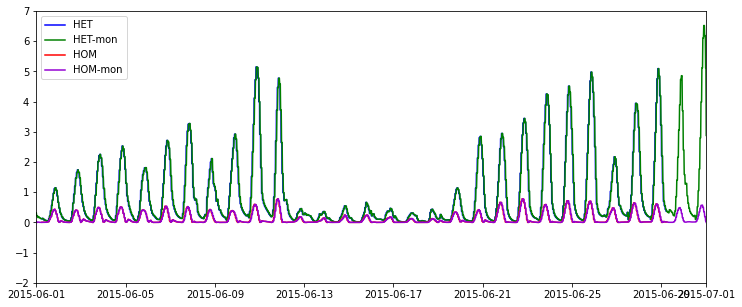

In [13]:
# fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
#                      facecolor='w', edgecolor='k')


# ax1.plot(timesHTG,np.squeeze(htgDS.THLP2_CLUBB.values)[:,-1],'b',label='HET')
# ax1.plot(timeHTG_mon, np.squeeze(monHTG_ds.THLP2_CLUBB.values)[:,-1],'g',label='HET-mon')
# ax1.plot(timesHMG,np.squeeze(hmgDS.THLP2_CLUBB.values)[:,-1],'r',label='HOM')
# ax1.plot(timeHMG_mon,np.squeeze(monHMG_ds.THLP2_CLUBB.values)[:,-1],color='darkviolet',label='HOM-mon')

# ax1.legend()
# ax1.set_ylim([-2,7])
# ax1.set_xlim(datetime.date(2015,6,1), datetime.date(2015,7,1))


Text(0.5, 1.0, 'TBOT')

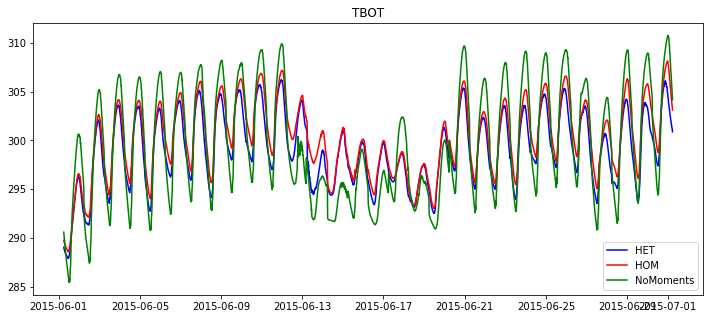

In [13]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
                     facecolor='w', edgecolor='k')


ax1.plot(timesHTG,np.squeeze(htgDS.T.values)[:,-1],'b',label='HET')
ax1.plot(timesHMG,np.squeeze(hmgDS.T.values)[:,-1],'r',label='HOM')
ax1.plot(timesNoMom,np.squeeze(noMomDS.T.values)[:,-1],'g',label='NoMoments')
ax1.legend()
ax1.set_title('TBOT')


Text(0.5, 1.0, 'TBOT')

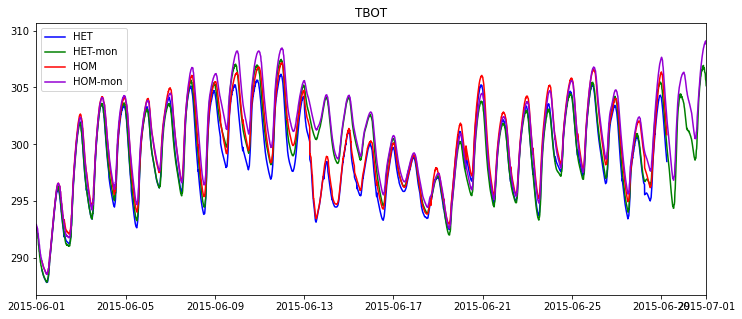

In [14]:
# fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
#                      facecolor='w', edgecolor='k')


# ax1.plot(timesHTG,np.squeeze(htgDS.T.values)[:,-1],'b',label='HET')
# ax1.plot(timeHTG_mon, np.squeeze(monHTG_ds.T.values)[:,-1],'g',label='HET-mon')
# ax1.plot(timesHMG,np.squeeze(hmgDS.T.values)[:,-1],'r',label='HOM')
# ax1.plot(timeHMG_mon,np.squeeze(monHMG_ds.T.values)[:,-1],color='darkviolet',label='HOM-mon')
# ax1.legend()
# ax1.set_xlim(datetime.date(2015,6,1), datetime.date(2015,7,1))
# ax1.set_title('TBOT')


Text(0.5, 1.0, 'TGCLDLWP')

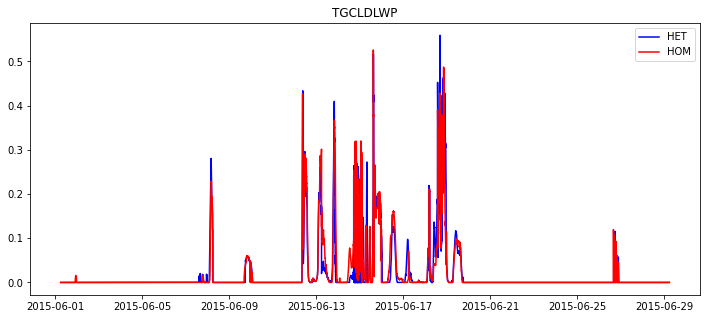

In [15]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
                     facecolor='w', edgecolor='k')


ax1.plot(timesHTG,np.squeeze(htgDS.TGCLDLWP.values)[:],'b',label='HET')
ax1.plot(timesHMG,np.squeeze(hmgDS.TGCLDLWP.values)[:],'r',label='HOM')
ax1.legend()
ax1.set_title('TGCLDLWP')

(-1e-07, 1.3e-06)

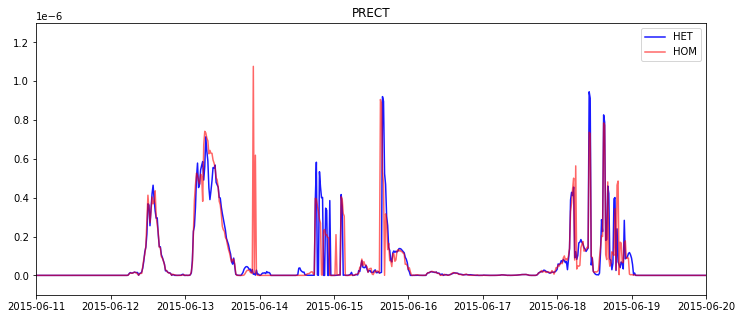

In [243]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
                     facecolor='w', edgecolor='k')


ax1.plot(timesHTG,np.squeeze(htgDS.PRECT.values)[:],'b',label='HET',alpha=0.9)
ax1.plot(timesHMG,np.squeeze(hmgDS.PRECT.values)[:],'r',label='HOM',alpha=0.6)
#ax1.plot(timesNoMom,np.squeeze(noMomDS.PRECT.values)[:],'g',label='NoMoments',alpha=0.6)
ax1.legend()
ax1.set_title('PRECT')
ax1.set_xlim(datetime.date(2015,6,11),datetime.date(2015,6,20))
ax1.set_ylim([-0.1e-6, 1.3e-6])


(16597.0, 16606.0)

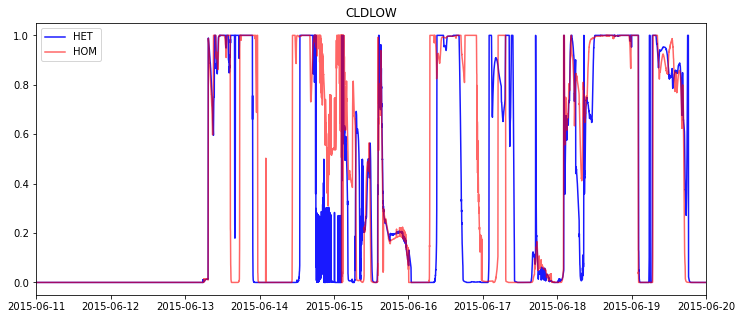

In [18]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
                     facecolor='w', edgecolor='k')


ax1.plot(timesHTG,np.squeeze(htgDS.CLDLOW.values)[:],'b',label='HET',alpha=0.9)
ax1.plot(timesHMG,np.squeeze(hmgDS.CLDLOW.values)[:],'r',label='HOM',alpha=0.6)
ax1.legend()
ax1.set_title('CLDLOW')
ax1.set_xlim(datetime.date(2015,6,11),datetime.date(2015,6,20))


In [244]:
print('                                        HMG      HTG')
print('Vert. Integrated low-cloud fraction:   %.3f   %.3f' % (np.nanmean(hmgDS.CLDLOW.values), np.nanmean(htgDS.CLDLOW.values)))
print('Vert. Integrated mid-cloud fraction:   %.3f   %.3f' % (np.nanmean(hmgDS.CLDMED.values), np.nanmean(htgDS.CLDMED.values)))
print('Vert. Integrated high-cloud fraction:  %.3f   %.3f' % (np.nanmean(hmgDS.CLDHGH.values), np.nanmean(htgDS.CLDHGH.values)))
print('Vert. Integrated total-cloud fraction: %.3f   %.3f' % (np.nanmean(hmgDS.CLDTOT.values), np.nanmean(htgDS.CLDTOT.values)))
print()
print('Shortwave cloud forcing (W/m2):        %.3f   %.3f' % (np.nanmean(hmgDS.SWCF.values), np.nanmean(htgDS.SWCF.values)))
print('Longwave cloud forcing (W/m2):         %.3f   %.3f' % (np.nanmean(hmgDS.LWCF.values), np.nanmean(htgDS.LWCF.values)))


                                        HMG      HTG
Vert. Integrated low-cloud fraction:   0.100   0.120
Vert. Integrated mid-cloud fraction:   0.110   0.112
Vert. Integrated high-cloud fraction:  0.624   0.626
Vert. Integrated total-cloud fraction: 0.632   0.636

Shortwave cloud forcing (W/m2):        -11.911   -14.142
Longwave cloud forcing (W/m2):         10.397   10.901


## Compare to what's in Nate's forcing files?

In [127]:
nateHMGfile = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-hmg.nc'
nateHTGfile = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-htg.nc'

nateHMG = xr.open_dataset(nateHMGfile,decode_times=True)
nateHTG = xr.open_dataset(nateHTGfile,decode_times=True)



(-2.0, 7.0)

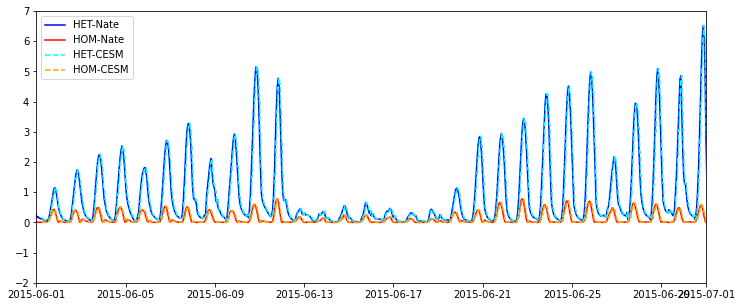

In [15]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
                     facecolor='w', edgecolor='k')


ax1.plot(nateHTG.time.values,np.squeeze(nateHTG.thlp2.values)[:],'b',label='HET-Nate')
ax1.plot(nateHMG.time.values,np.squeeze(nateHMG.thlp2.values)[:],'r',label='HOM-Nate')
ax1.plot(timesHTG,np.squeeze(htgDS.THLP2_CLUBB.values)[:,-1],'--',marker='',color='cyan',label='HET-CESM')
ax1.plot(timesHMG,np.squeeze(hmgDS.THLP2_CLUBB.values)[:,-1],'--',color='orange',label='HOM-CESM')
ax1.legend()
ax1.set_xlim(datetime.date(2015,6,1), datetime.date(2015,7,1))
ax1.set_ylim([-2,7])

#ax1.set_xlim(datetime.date(2015,6,3), datetime.date(2015,6,5))


In [22]:
nateHTG

<xarray.Dataset>
Dimensions:       (lev: 37, time: 33600)
Coordinates:
  * time          (time) datetime64[ns] 2015-01-01 ... 2018-10-31T22:49:25.42...
  * lev           (lev) float32 1000.0 975.0 950.0 925.0 ... 150.0 125.0 100.0
Data variables:
    base_time     datetime64[ns] ...
    time_offset   (time) datetime64[ns] ...
    year          (time) float64 ...
    month         (time) float64 ...
    day           (time) float64 ...
    hour          (time) float64 ...
    minute        (time) float64 ...
    lat           float32 ...
    lon           float32 ...
    alt           float32 ...
    phis          float32 ...
    T             (time, lev) float32 ...
    q             (time, lev) float32 ...
    u             (time, lev) float32 ...
    v             (time, lev) float32 ...
    omega         (time, lev) float32 ...
    div           (time, lev) float32 ...
    T_adv_h       (time, lev) float32 ...
    T_adv_v       (time, lev) float32 ...
    q_adv_h       (time, lev) float32 ...
    q_adv_v       (time, lev) float32 ...
    s             (time, lev) float32 ...
    s_adv_h       (time, lev) float32 ...
    s_adv_v       (time, lev) float32 ...
    dsdt          (time, lev) float32 ...
    dTdt          (time, lev) float32 ...
    dqdt          (time, lev) float32 ...
    q1            (time, lev) float32 ...
    q2            (time, lev) float32 ...
    prec_srf      (time) float32 ...
    LH            (time) float32 ...
    SH            (time) float32 ...
    p_srf_aver    (time) float32 ...
    p_srf_center  (time) float32 ...
    T_srf         (time) float32 ...
    T_soil        (time) float32 ...
    RH_srf        (time) float32 ...
    wspd_srf      (time) float32 ...
    u_srf         (time) float32 ...
    v_srf         (time) float32 ...
    rad_net_srf   (time) float32 ...
    lw_net_toa    (time) float32 ...
    sw_net_toa    (time) float32 ...
    sw_dn_toa     (time) float32 ...
    cld_low       (time) float32 ...
    cld_mid       (time) float32 ...
    cld_high      (time) float32 ...
    cld_tot       (time) float32 ...
    cld_thick     (time) float32 ...
    cld_top       (time) float32 ...
    LWP           (time) float32 ...
    dh2odt_col    (time) float32 ...
    h2o_adv_col   (time) float32 ...
    evap_srf      (time) float32 ...
    dsdt_col      (time) float32 ...
    s_adv_col     (time) float32 ...
    rad_heat_col  (time) float32 ...
    LH_col        (time) float32 ...
    omega_srf     (time) float32 ...
    q_srf         (time) float32 ...
    s_srf         (time) float32 ...
    PW            (time) float32 ...
    lw_up_srf     (time) float32 ...
    lw_dn_srf     (time) float32 ...
    sw_up_srf     (time) float32 ...
    sw_dn_srf     (time) float32 ...
    T_skin        (time) float32 ...
    TEST          (time) float64 ...
    wpqtp_sfc     (time) float32 ...
    wpthlp_sfc    (time) float32 ...
    qp2           (time) float32 ...
    thlp2         (time) float32 1.4463 0.8122 0.5709 ... -9999.9 -9999.9
    thlpqp        (time) float32 ...
    wp2           (time) float32 ...
    wp4           (time) float32 ...
    wp2thetap     (time) float32 ...
    wp2qp         (time) float32 ...
    wpqp2         (time) float32 ...
    wpthetap2     (time) float32 ...
    wpthetapqp    (time) float32 ...
    wp3           (time) float32 ...
    upwp          (time) float32 ...
    vpwp          (time) float32 ...
Attributes:
    Conventions:   CF-1.7
    title:         VarAna 1hr RAP_Based v2: SGP 2015-01
    history:       Mon Feb 17 20:27:23 2020: ncrcat sgp60varanarapC1.c1.20150...
    update:        surface LH and SH are merged from ECOR and EBBR instruments
    date_created:  Thu Apr 13 20:12:17 2017
    contact:       Shuaiqi Tang: tang32@llnl.gov, Qi Tang: tang30@llnl.gov, Y...
    program_name:  proc_output_nwp.pro
    institution:   Lawrence Livermore National Laboratory, CA, USA
    references:    https://www.arm.gov/data/data-sources/varanal-29
    note:          Data

Text(0.5, 1.0, 'wp2thlp')

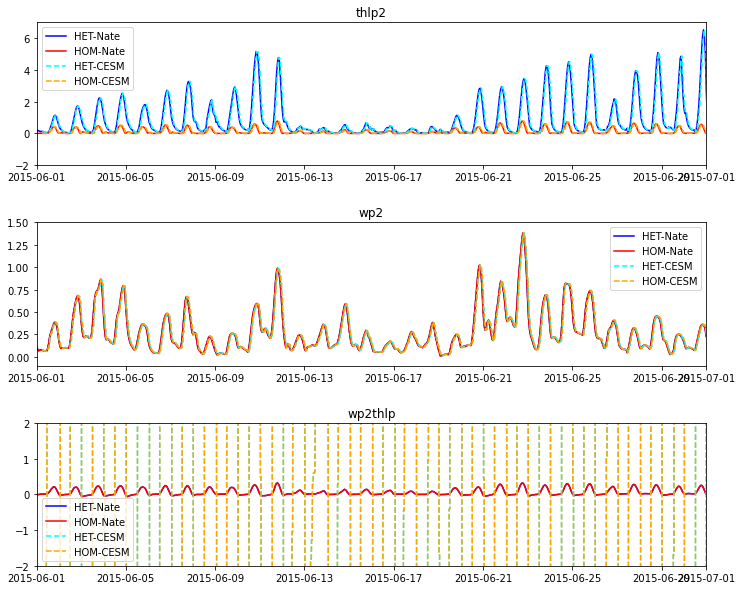

In [48]:
fig, axs = plt.subplots(3,1, figsize=(12, 10), 
                     facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.4)

# First plot: thlp2
axs[0].plot(nateHTG.time.values,np.squeeze(nateHTG.thlp2.values)[:],'b',label='HET-Nate')
axs[0].plot(nateHMG.time.values,np.squeeze(nateHMG.thlp2.values)[:],'r',label='HOM-Nate')
axs[0].plot(timesHTG,np.squeeze(htgDS.THLP2_CLUBB.values)[:,-1],'--',marker='',color='cyan',label='HET-CESM')
axs[0].plot(timesHMG,np.squeeze(hmgDS.THLP2_CLUBB.values)[:,-1],'--',color='orange',label='HOM-CESM')
axs[0].legend()
axs[0].set_xlim(datetime.date(2015,6,1), datetime.date(2015,7,1))
axs[0].set_ylim([-2,7])
axs[0].set_title('thlp2')

# # Second plot: wpthlp2
# axs[1].plot(nateHTG.time.values,np.squeeze(nateHTG.wp2.values)[:],'b',label='HET-Nate')
# axs[1].plot(nateHMG.time.values,np.squeeze(nateHMG.wp2.values)[:],'r',label='HOM-Nate')
# axs[1].plot(timesHTG,np.squeeze(htgDS.WP2_CLUBB.values)[:,-1],'--',marker='',color='cyan',label='HET-CESM')
# axs[1].plot(timesHMG,np.squeeze(hmgDS.WP2_CLUBB.values)[:,-1],'--',color='orange',label='HOM-CESM')
# axs[1].legend()
# axs[1].set_xlim(datetime.date(2015,6,1), datetime.date(2015,7,1))
# axs[1].set_ylim([-0.1,1.5])
# axs[1].set_title('wp2')

# # Third plot: wp2thlp
# axs[2].plot(nateHTG.time.values,np.squeeze(nateHTG.wpthlp_sfc.values)[:],'b',label='HET-Nate')
# axs[2].plot(nateHMG.time.values,np.squeeze(nateHMG.wpthlp_sfc.values)[:],'r',label='HOM-Nate')
# axs[2].plot(timesHTG,np.squeeze(htgDS.WPTHLP_CLUBB.values)[:,-1],'--',marker='',color='cyan',label='HET-CESM')
# axs[2].plot(timesHMG,np.squeeze(hmgDS.WPTHLP_CLUBB.values)[:,-1],'--',color='orange',label='HOM-CESM')
# axs[2].legend()
# axs[2].set_xlim(datetime.date(2015,6,1), datetime.date(2015,7,1))
# axs[2].set_ylim([-2,2])
# axs[2].set_title('wp2thlp')



(16589.0, 16591.0)

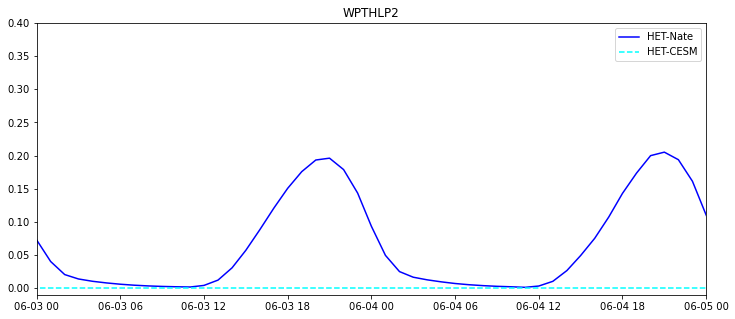

In [245]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
                     facecolor='w', edgecolor='k')


ax1.plot(nateHTG.time.values,np.squeeze(nateHTG.wpthetap2.values)[:],'b',label='HET-Nate')
#ax1.plot(nateHMG.time.values,np.squeeze(nateHMG.wpthetap2.values)[:],'r',label='HOM-Nate')
ax1.plot(timesHTG,np.squeeze(htgDS.WPTHLP2_CLUBB.values)[:,-2],'--',marker='',color='cyan',label='HET-CESM')
#ax1.plot(timesHMG,np.squeeze(hmgDS.WPTHLP2_CLUBB.values)[:,-1],'--',color='orange',label='HOM-CESM')
ax1.legend()
ax1.set_xlim(datetime.date(2015,6,1), datetime.date(2015,7,1))
ax1.set_ylim([-0.01,0.4])
ax1.set_title('WPTHLP2')

ax1.set_xlim(datetime.date(2015,6,3), datetime.date(2015,6,5))



(0.0, 15000.0)

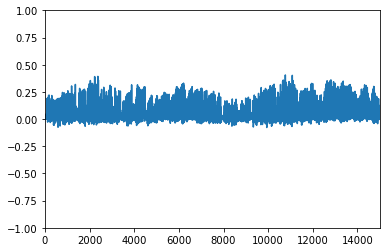

In [263]:
plt.plot(nateHTG.wpthlp_sfc.values)
plt.ylim([-1,1])
plt.xlim([0,15000])

(16589.0, 16591.0)

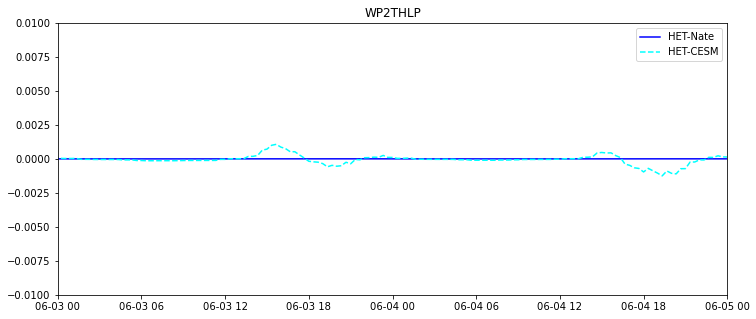

In [264]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
                     facecolor='w', edgecolor='k')


ax1.plot(nateHTG.time.values,np.squeeze(nateHTG.wp2thetap.values)[:],'b',label='HET-Nate')
#ax1.plot(nateHMG.time.values,np.squeeze(nateHMG.wpthetap2.values)[:],'r',label='HOM-Nate')
ax1.plot(timesHTG,np.squeeze(htgDS.WP2THLP_CLUBB.values)[:,-2],'--',marker='',color='cyan',label='HET-CESM')
#ax1.plot(timesHMG,np.squeeze(hmgDS.WPTHLP2_CLUBB.values)[:,-1],'--',color='orange',label='HOM-CESM')
ax1.legend()
ax1.set_xlim(datetime.date(2015,6,1), datetime.date(2015,7,1))
ax1.set_ylim([-0.01,0.01])
ax1.set_title('WP2THLP')

ax1.set_xlim(datetime.date(2015,6,3), datetime.date(2015,6,5))




(16589.0, 16591.0)

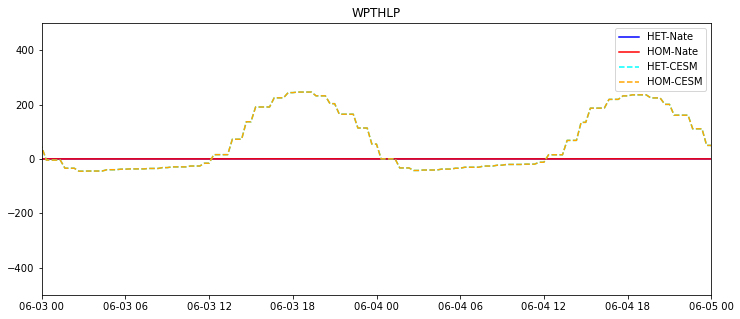

In [226]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
                     facecolor='w', edgecolor='k')


ax1.plot(nateHTG.time.values,np.squeeze(nateHTG.wpthlp_sfc.values)[:],'b',label='HET-Nate')
ax1.plot(nateHMG.time.values,np.squeeze(nateHMG.wpthlp_sfc.values)[:],'r',label='HOM-Nate')
ax1.plot(timesHTG,np.squeeze(htgDS.WPTHLP_CLUBB.values)[:,-1],'--',marker='',color='cyan',label='HET-CESM')
ax1.plot(timesHMG,np.squeeze(hmgDS.WPTHLP_CLUBB.values)[:,-1],'--',color='orange',label='HOM-CESM')
ax1.legend()
ax1.set_xlim(datetime.date(2015,6,1), datetime.date(2015,7,1))
ax1.set_ylim([-500,500])
ax1.set_title('WPTHLP')

ax1.set_xlim(datetime.date(2015,6,3), datetime.date(2015,6,5))




AttributeError: 'Dataset' object has no attribute 'WP2RTP_CLUBB'

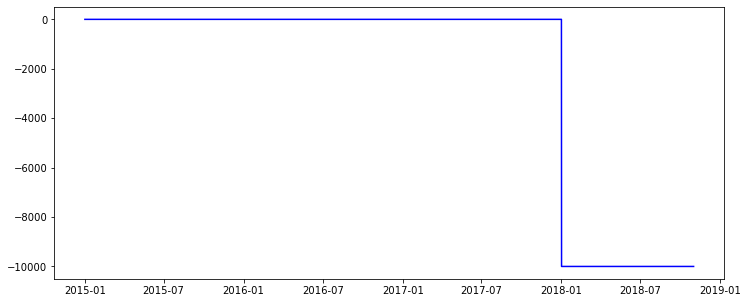

In [231]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5), 
                     facecolor='w', edgecolor='k')


ax1.plot(nateHTG.time.values,np.squeeze(nateHTG.wp2qp.values)[:],'b',label='HET-Nate')
#ax1.plot(nateHMG.time.values,np.squeeze(nateHMG.wp2qp.values)[:],'r',label='HOM-Nate')
ax1.plot(timesHTG,np.squeeze(htgDS.WP2RTP_CLUBB.values)[:,-2],'--',marker='',color='cyan',label='HET-CESM')
#ax1.plot(timesHMG,np.squeeze(hmgDS.WP2RTP_CLUBB.values)[:,-1],'--',color='orange',label='HOM-CESM')
ax1.legend()
ax1.set_xlim(datetime.date(2015,6,1), datetime.date(2015,7,1))
ax1.set_ylim([-0.01,0.4])
ax1.set_title('WP2RTP_CLUBB')

ax1.set_xlim(datetime.date(2015,6,3), datetime.date(2015,6,5))




## Interpolate to common vertical pressure grid 

In [7]:
print('ilev: ', hmgDS.ilev.values) 
print()
print('lev: ', hmgDS.lev.values)

ilev:  [   2.25523952    5.03169186   10.15794743   18.55531707   29.7346756
   39.27300125   47.11449891   56.24049902   66.80049747   80.70141822
   94.94104236  111.6932109   131.40127063  154.58680689  181.86335266
  213.95282075  251.70441717  296.11721635  348.36658835  409.83521938
  482.14992881  567.22442061  652.33296901  730.44589162  796.36307061
  845.35366669  873.71586636  900.32463148  924.96446241  947.43233453
  967.53862454  985.11219025 1000.        ]

lev:  [  3.64346569   7.59481965  14.35663225  24.61222     35.92325002
  43.19375008  51.67749897  61.52049825  73.75095785  87.82123029
 103.31712663 121.54724076 142.99403876 168.22507977 197.9080867
 232.82861896 273.91081676 322.24190235 379.10090387 445.9925741
 524.68717471 609.77869481 691.38943031 763.40448111 820.85836865
 859.53476653 887.02024892 912.64454694 936.19839847 957.48547954
 976.32540739 992.55609512]


**Homogeneous case**

In [16]:
p0mb = hmgDS.P0.values[0]/100        # mb

# New pressure levels in hPa 
pnew = [975.0, 950.0, 925.0, 900.0, 875.0, 850.0, 800.0, 750.0, 700.0, 650.0, 600.0]

# Pull out hya/hyb profiles 
hyam = hmgDS.hyam.values[0,:]
hybm = hmgDS.hybm.values[0,:]
hyai = hmgDS.hyai.values[0,:]
hybi = hmgDS.hybi.values[0,:]

# Surface pressure with time dimension
PS   = hmgDS.PS.values              # Pa 

# Variables I want to convert... 
THLP2  = hmgDS.THLP2_CLUBB.values
WPTHLP = hmgDS.WPTHLP_CLUBB.values
UP2    = hmgDS.UP2_CLUBB.values
WP2    = hmgDS.WP2_CLUBB.values
WP3    = hmgDS.WP3_CLUBB.values
WPTHVP = hmgDS.WPTHVP_CLUBB.values
WSUB   = hmgDS.WSUB.values 
T      = hmgDS.T.values
Q      = hmgDS.Q.values
OMEGA  = hmgDS.OMEGA.values  
THETAL = hmgDS.THETAL.values

# Converting: 
THLP2_hmg  = Ngl.vinth2p(THLP2,hyai,hybi,pnew,PS,1,p0mb,1,True)
WPTHLP_hmg = Ngl.vinth2p(WPTHLP,hyai,hybi,pnew,PS,1,p0mb,1,True)
UP2_hmg    = Ngl.vinth2p(UP2,hyai,hybi,pnew,PS,1,p0mb,1,True)
WP2_hmg    = Ngl.vinth2p(WP2,hyai,hybi,pnew,PS,1,p0mb,1,True)
WP3_hmg    = Ngl.vinth2p(WP3,hyai,hybi,pnew,PS,1,p0mb,1,True)

WPTHVP_hmg = Ngl.vinth2p(WPTHVP,hyam,hybm,pnew,PS,1,p0mb,1,True)
WSUB_hmg   = Ngl.vinth2p(WSUB,hyam,hybm,pnew,PS,1,p0mb,1,True)
T_hmg      = Ngl.vinth2p(T,hyam,hybm,pnew,PS,1,p0mb,1,True)
Q_hmg      = Ngl.vinth2p(Q,hyam,hybm,pnew,PS,1,p0mb,1,True)
OMEGA_hmg  = Ngl.vinth2p(OMEGA,hyam,hybm,pnew,PS,1,p0mb,1,True)
THETAL_hmg = Ngl.vinth2p(THETAL,hyam,hybm,pnew,PS,1,p0mb,1,True)


In [17]:
print('Mean PS: ', np.nanmean(PS))

Mean PS:  97551.1


In [10]:
# Compute TKE? 
rgas = 287.058            # J/(kg-K) => m2/(s2 K)
g    = 9.80665            # m/s2
rho  = pnew/(rgas*T_hmg)         # density => kg/m3
w_hmg = -OMEGA_hmg/(rho*g)

TKE_hmg = w_hmg*UP2_hmg

# I think you actually need to convert omega into w, wsub is the "Diagnostic sub-grid vertical velocity"

**Heterogeneous case**

In [18]:
p0mb = htgDS.P0.values[0]/100        # mb

# New pressure levels in hPa 
pnew = [ 975.0, 950.0, 925.0, 900.0, 875.0, 850.0, 800.0, 750.0, 700.0, 650.0, 600.0]

# Pull out hya/hyb profiles 
hyam = htgDS.hyam.values[0,:]
hybm = htgDS.hybm.values[0,:]
hyai = htgDS.hyai.values[0,:]
hybi = htgDS.hybi.values[0,:]

# Surface pressure with time dimension
PS   = htgDS.PS.values              # Pa 

# Variables I want to convert... 
THLP2  = htgDS.THLP2_CLUBB.values
WPTHLP = htgDS.WPTHLP_CLUBB.values
UP2    = htgDS.UP2_CLUBB.values
WP2    = htgDS.WP2_CLUBB.values
WP3    = htgDS.WP3_CLUBB.values
WPTHVP = htgDS.WPTHVP_CLUBB.values
WSUB   = htgDS.WSUB.values 
T      = htgDS.T.values
Q      = htgDS.Q.values
OMEGA  = htgDS.OMEGA.values  
THETAL = htgDS.THETAL.values

# Converting: 
THLP2_htg  = Ngl.vinth2p(THLP2,hyai,hybi,pnew,PS,1,p0mb,1,True)
WPTHLP_htg = Ngl.vinth2p(WPTHLP,hyai,hybi,pnew,PS,1,p0mb,1,True)
UP2_htg    = Ngl.vinth2p(UP2,hyai,hybi,pnew,PS,1,p0mb,1,True)
WP2_htg    = Ngl.vinth2p(WP2,hyai,hybi,pnew,PS,1,p0mb,1,True)
WP3_htg    = Ngl.vinth2p(WP3,hyai,hybi,pnew,PS,1,p0mb,1,True)

WPTHVP_htg = Ngl.vinth2p(WPTHVP,hyam,hybm,pnew,PS,1,p0mb,1,True)
WSUB_htg   = Ngl.vinth2p(WSUB,hyam,hybm,pnew,PS,1,p0mb,1,True)
T_htg      = Ngl.vinth2p(T,hyam,hybm,pnew,PS,1,p0mb,1,True)
Q_htg      = Ngl.vinth2p(Q,hyam,hybm,pnew,PS,1,p0mb,1,True)
OMEGA_htg  = Ngl.vinth2p(OMEGA,hyam,hybm,pnew,PS,1,p0mb,1,True)
THETAL_htg = Ngl.vinth2p(THETAL,hyam,hybm,pnew,PS,1,p0mb,1,True)


In [19]:
print('Mean PS: ', np.nanmean(PS))

Mean PS:  97551.1


In [ ]:
# Compute TKE?
rgas = 287.058            # J/(kg-K) => m2/(s2 K)
g    = 9.80665            # m/s2

# Compute rho per day 
pnew_days = np.full([np.shape(T_htg)[0], len(pnew)],np.nan)
for ilev in range(len(pnew)):
    pnew_days[:,ilev] = pnew[ilev]
    
rho  = pnew_days/(rgas*T_htg)         # density => kg/m3
w_htg = -OMEGA_htg/(rho*g)

TKE_htg = w_htg*UP2_htg

# I think you actually need to convert omega into w, wsub is the "Diagnostic sub-grid vertical velocity"

**No prescribed moments case**

In [20]:
p0mb = noMomDS.P0.values[0]/100        # mb

# New pressure levels in hPa 
pnew = [975.0, 950.0, 925.0, 900.0, 875.0, 850.0, 800.0, 750.0, 700.0, 650.0, 600.0]

# Pull out hya/hyb profiles 
hyam = noMomDS.hyam.values[0,:]
hybm = noMomDS.hybm.values[0,:]
hyai = noMomDS.hyai.values[0,:]
hybi = noMomDS.hybi.values[0,:]

# Surface pressure with time dimension
PS   = noMomDS.PS.values              # Pa 

# Variables I want to convert... 
THLP2  = noMomDS.THLP2_CLUBB.values
WPTHLP = noMomDS.WPTHLP_CLUBB.values
UP2    = noMomDS.UP2_CLUBB.values
WP2    = noMomDS.WP2_CLUBB.values
WP3    = noMomDS.WP3_CLUBB.values
WPTHVP = noMomDS.WPTHVP_CLUBB.values
WSUB   = noMomDS.WSUB.values 
T      = noMomDS.T.values
Q      = noMomDS.Q.values
OMEGA  = noMomDS.OMEGA.values  
THETAL = noMomDS.THETAL.values

# Converting: 
THLP2_noMom  = Ngl.vinth2p(THLP2,hyai,hybi,pnew,PS,1,p0mb,1,True)
WPTHLP_noMom = Ngl.vinth2p(WPTHLP,hyai,hybi,pnew,PS,1,p0mb,1,True)
UP2_noMom    = Ngl.vinth2p(UP2,hyai,hybi,pnew,PS,1,p0mb,1,True)
WP2_noMom    = Ngl.vinth2p(WP2,hyai,hybi,pnew,PS,1,p0mb,1,True)
WP3_noMom    = Ngl.vinth2p(WP3,hyai,hybi,pnew,PS,1,p0mb,1,True)

WPTHVP_noMom = Ngl.vinth2p(WPTHVP,hyam,hybm,pnew,PS,1,p0mb,1,True)
WSUB_noMom   = Ngl.vinth2p(WSUB,hyam,hybm,pnew,PS,1,p0mb,1,True)
T_noMom      = Ngl.vinth2p(T,hyam,hybm,pnew,PS,1,p0mb,1,True)
Q_noMom      = Ngl.vinth2p(Q,hyam,hybm,pnew,PS,1,p0mb,1,True)
OMEGA_noMom  = Ngl.vinth2p(OMEGA,hyam,hybm,pnew,PS,1,p0mb,1,True)
THETAL_noMom = Ngl.vinth2p(THETAL,hyam,hybm,pnew,PS,1,p0mb,1,True)



In [21]:
np.nanmean(PS)

97551.1

## Plot vertical profiles (pressure levs)

In [25]:
timeSelHTG   = np.where((timesHTG.day==4) & (timesHTG.hour>=14) & (timesHTG.hour<16))[0]
timeSelHMG   = np.where((timesHMG.day==4) & (timesHMG.hour>=14) & (timesHMG.hour<16))[0]
timeSelNoMom = np.where((timesNoMom.day==4) & (timesNoMom.hour>=14) & (timesNoMom.hour<16))[0]


In [36]:
hmgDS.isel(time=timeSelHMG).PRECT.values.sum()

0.0

In [40]:
print('Precipitation: \n HMG: %7.3f \n HTG: %7.3f \n noMom: %5.3f' % (hmgDS.isel(time=timeSelHMG).PRECT.values.sum(), 
                                                                   htgDS.isel(time=timeSelHTG).PRECT.values.sum(), 
                                                                   noMomDS.isel(time=timeSelNoMom).PRECT.values.sum())
     )


Precipitation: 
 HMG:   0.000 
 HTG:   0.000 
 noMom: 0.000


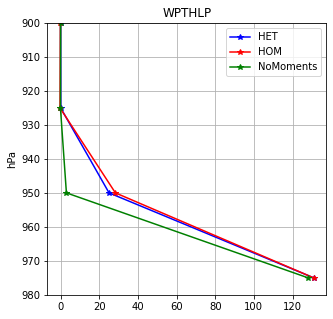

In [26]:
fig, ax1 = plt.subplots(1,1, figsize=(5, 5), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(WPTHLP_htg[timeSelHTG]),axis=0),pnew,'b-*',label='HET')
ax1.plot(np.nanmean(np.squeeze(WPTHLP_hmg[timeSelHMG]),axis=0),pnew,'r-*',label='HOM')
ax1.plot(np.nanmean(np.squeeze(WPTHLP_noMom[timeSelNoMom]),axis=0),pnew,'g-*',label='NoMoments')
ax1.legend()
ax1.set_ylim([900,980])
#ax1.set_xlim([-0.05,0.8])
ax1.set_title('WPTHLP')
ax1.set_ylabel('hPa')

plt.gca().invert_yaxis()
plt.grid()

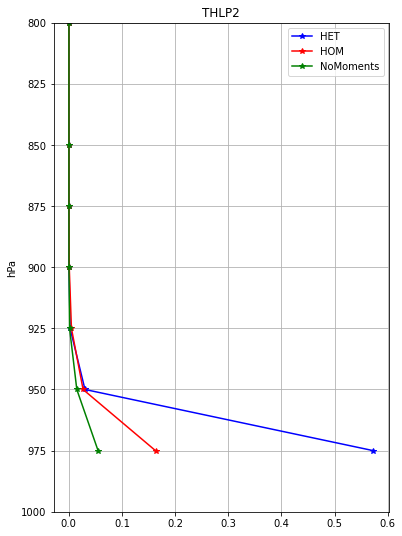

In [27]:
fig, ax1 = plt.subplots(1,1, figsize=(6, 9), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(THLP2_htg[timeSelHTG]),axis=0),pnew,'b-*',label='HET')
ax1.plot(np.nanmean(np.squeeze(THLP2_hmg[timeSelHMG]),axis=0),pnew,'r-*',label='HOM')
ax1.plot(np.nanmean(np.squeeze(THLP2_noMom[timeSelNoMom]),axis=0),pnew,'g-*',label='NoMoments')
ax1.legend()
ax1.set_ylim([800,1000])
#ax1.set_xlim([-0.05,0.8])
ax1.set_title('THLP2')
ax1.set_ylabel('hPa')

plt.gca().invert_yaxis()
plt.grid()

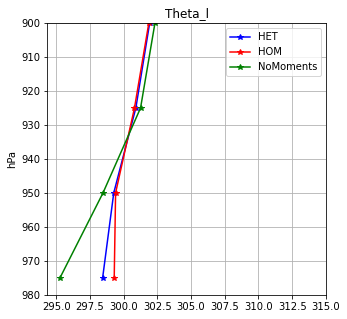

In [29]:
fig, ax1 = plt.subplots(1,1, figsize=(5, 5), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(THETAL_htg[timeSelHTG]),axis=0),pnew,'b-*',label='HET')
ax1.plot(np.nanmean(np.squeeze(THETAL_hmg[timeSelHMG]),axis=0),pnew,'r-*',label='HOM')
ax1.plot(np.nanmean(np.squeeze(THETAL_noMom[timeSelNoMom]),axis=0),pnew,'g-*',label='NoMoments')
ax1.legend()
ax1.set_ylim([900,980])
#ax1.set_xlim([-0.05,0.8])
ax1.set_title('Theta_l')
ax1.set_ylabel('hPa')

plt.gca().invert_yaxis()
plt.grid()

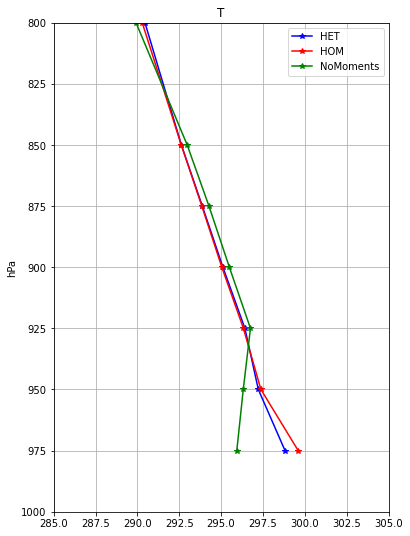

In [30]:
fig, ax1 = plt.subplots(1,1, figsize=(6, 9), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(T_htg[timeSelHTG]),axis=0),pnew,'b-*',label='HET')
ax1.plot(np.nanmean(np.squeeze(T_hmg[timeSelHMG]),axis=0),pnew,'r-*',label='HOM')
ax1.plot(np.nanmean(np.squeeze(T_noMom[timeSelNoMom]),axis=0),pnew,'g-*',label='NoMoments')
ax1.legend()
ax1.set_ylim([800,1000])
ax1.set_xlim([285,305])
#ax1.set_xlim([-0.05,0.8])
ax1.set_title('T')
ax1.set_ylabel('hPa')

plt.gca().invert_yaxis()
plt.grid()


## Plot vertical profiles (model levs - quick look)?

In [62]:
# Get date Meng used: 4 June 2015, average of 14-16 UTC (morning, 8a-10a)

timeSelHTG = np.where((timesHTG.day==4) & (timesHTG.hour>=14) & (timesHTG.hour<=16))[0]
timeSelHMG = np.where((timesHMG.day==4) & (timesHMG.hour>=14) & (timesHMG.hour<=16))[0]

hmgDS_sel = hmgDS.isel(time=timeSelHMG)
htgDS_sel = htgDS.isel(time=timeSelHTG)

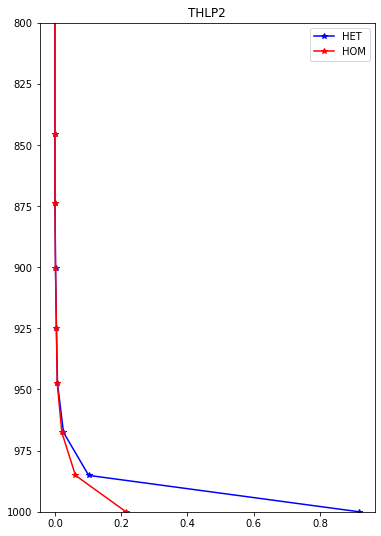

In [63]:
fig, ax1 = plt.subplots(1,1, figsize=(6, 9), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(htgDS_sel.THLP2_CLUBB.values),axis=0),htgDS_sel.ilev.values,'b-*',label='HET')
ax1.plot(np.nanmean(np.squeeze(hmgDS_sel.THLP2_CLUBB.values),axis=0),hmgDS_sel.ilev.values,'r-*',label='HOM')
ax1.legend()
ax1.set_ylim([800,1000])
#ax1.set_xlim([-0.05,0.8])
ax1.set_title('THLP2')

plt.gca().invert_yaxis()



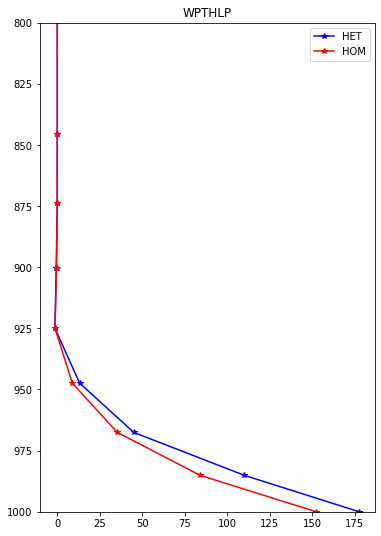

In [101]:
fig, ax1 = plt.subplots(1,1, figsize=(6, 9), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(htgDS_sel.WPTHLP_CLUBB.values),axis=0),htgDS_sel.ilev.values,'b-*',label='HET')
ax1.plot(np.nanmean(np.squeeze(hmgDS_sel.WPTHLP_CLUBB.values),axis=0),hmgDS_sel.ilev.values,'r-*',label='HOM')
ax1.legend()
ax1.set_ylim([800,1000])
#ax1.set_xlim([0,0.8])
ax1.set_title('WPTHLP')

plt.gca().invert_yaxis()


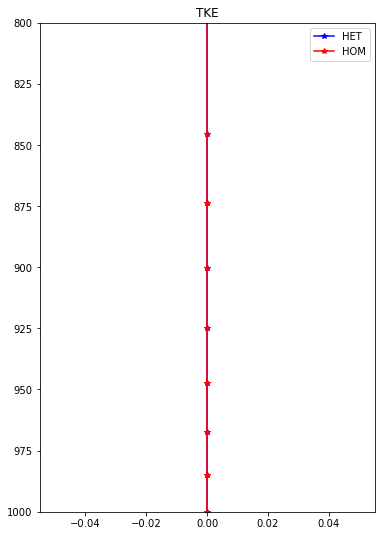

In [102]:
fig, ax1 = plt.subplots(1,1, figsize=(6, 9), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(htgDS_sel.TKE.values),axis=0),htgDS_sel.ilev.values,'b-*',label='HET')
ax1.plot(np.nanmean(np.squeeze(hmgDS_sel.TKE.values),axis=0),hmgDS_sel.ilev.values,'r-*',label='HOM')
ax1.legend()
ax1.set_ylim([800,1000])
#ax1.set_xlim([0,0.8])
ax1.set_title('TKE')

plt.gca().invert_yaxis()



## Test out vertical resolutions 

In [61]:
dataDir='/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/VerticalResolution/'

htgStart = 'FSCAM.T42_T42.arm97.clasp_htg_'
hmgStart = 'FSCAM.T42_T42.arm97.clasp_hmg_'

endFile = 'levs.cam.h0.2015-06-03-00000.nc'

# ------------------------------------------------------
#    Files with 32 levels 
# ------------------------------------------------------
hmgFile = dataDir+hmgStart+'32'+endFile
htgFile = dataDir+htgStart+'32'+endFile

with xr.open_dataset(hmgFile, decode_times=True) as hmg_DS:
    hmg_DS['time']  = hmg_DS.indexes['time'].to_datetimeindex()

    # Select day: 
    times_hmg  = pd.DatetimeIndex(hmg_DS['time'].values)
    iTimeStart = np.where((times_hmg.day==4) & (times_hmg.hour==6))[0]
    iTimeEnd   = np.where((times_hmg.day==5) & (times_hmg.hour==6))[0]
    iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])

    hmg32 = hmg_DS.isel(time=iTimeRange)
    
with xr.open_dataset(htgFile, decode_times=True) as htg_DS:
    htg_DS['time']  = htg_DS.indexes['time'].to_datetimeindex()

    # Select day: 
    times_htg  = pd.DatetimeIndex(htg_DS['time'].values)
    iTimeStart = np.where((times_htg.day==4) & (times_htg.hour==6))[0]
    iTimeEnd   = np.where((times_htg.day==5) & (times_htg.hour==6))[0]
    iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])

    htg32 = htg_DS.isel(time=iTimeRange)


# ------------------------------------------------------
#    Files with 128 levels 
# ------------------------------------------------------
hmgFile = dataDir+hmgStart+'128'+endFile
htgFile = dataDir+htgStart+'128'+endFile

with xr.open_dataset(hmgFile, decode_times=True) as hmg_DS:
    hmg_DS['time']  = hmg_DS.indexes['time'].to_datetimeindex()

    # Select day: 
    times_hmg  = pd.DatetimeIndex(hmg_DS['time'].values)
    iTimeStart = np.where((times_hmg.day==4) & (times_hmg.hour==6))[0]
    iTimeEnd   = np.where((times_hmg.day==5) & (times_hmg.hour==6))[0]
    iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])

    hmg128 = hmg_DS.isel(time=iTimeRange)
    
with xr.open_dataset(htgFile, decode_times=True) as htg_DS:
    htg_DS['time']  = htg_DS.indexes['time'].to_datetimeindex()

    # Select day: 
    times_htg  = pd.DatetimeIndex(htg_DS['time'].values)
    iTimeStart = np.where((times_htg.day==4) & (times_htg.hour==6))[0]
    iTimeEnd   = np.where((times_htg.day==5) & (times_htg.hour==6))[0]
    iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])

    htg128 = htg_DS.isel(time=iTimeRange)
    
    
# ------------------------------------------------------
#   Files with 256 levels
# ------------------------------------------------------
hmgFile = dataDir+hmgStart+'256'+endFile
htgFile = dataDir+htgStart+'256'+endFile

with xr.open_dataset(hmgFile, decode_times=True) as hmg_DS:
    hmg_DS['time']  = hmg_DS.indexes['time'].to_datetimeindex()

    # Select day: 
    times_hmg  = pd.DatetimeIndex(hmg_DS['time'].values)
    iTimeStart = np.where((times_hmg.day==4) & (times_hmg.hour==6))[0]
    iTimeEnd   = np.where((times_hmg.day==5) & (times_hmg.hour==6))[0]
    iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])

    hmg256 = hmg_DS.isel(time=iTimeRange)
    
with xr.open_dataset(htgFile, decode_times=True) as htg_DS:
    htg_DS['time']  = htg_DS.indexes['time'].to_datetimeindex()

    # Select day: 
    times_htg  = pd.DatetimeIndex(htg_DS['time'].values)
    iTimeStart = np.where((times_htg.day==4) & (times_htg.hour==6))[0]
    iTimeEnd   = np.where((times_htg.day==5) & (times_htg.hour==6))[0]
    iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])

    htg256 = htg_DS.isel(time=iTimeRange)
    

In [64]:
times   = pd.DatetimeIndex(htg256.time.values)


### Check out meteorology first

In [211]:
htg32.PBLH

<xarray.DataArray 'PBLH' (time: 72, lat: 1, lon: 1)>
array([[[ 190.15608]],

       [[ 190.30057]],

       [[ 194.09917]],

       [[ 194.17844]],

       [[ 191.37961]],

       [[ 189.351  ]],

       [[ 191.46878]],

       [[ 191.57907]],

       [[ 188.64783]],

       [[ 187.23108]],

       [[ 185.89981]],

       [[ 185.09302]],

       [[ 184.70766]],

       [[ 184.3505 ]],

       [[ 183.67561]],

       [[ 180.22299]],

       [[ 180.1715 ]],

       [[ 180.32738]],

       [[ 180.09673]],

       [[ 190.00092]],

       [[ 180.19518]],

       [[ 240.43675]],

       [[ 247.93735]],

       [[ 302.1063 ]],

       [[ 311.65475]],

       [[ 318.76846]],

       [[ 470.94818]],

       [[ 551.5835 ]],

       [[ 742.84735]],

       [[ 777.6206 ]],

       [[ 860.1052 ]],

       [[ 901.4949 ]],

       [[ 990.5005 ]],

       [[1026.5585 ]],

       [[1098.1937 ]],

       [[1157.9432 ]],

       [[1246.0747 ]],

       [[1292.826  ]],

       [[1389.2155 ]],

       [[1460.1895 ]],

       [[1527.4435 ]],

       [[1573.7062 ]],

       [[1606.3793 ]],

       [[1621.8184 ]],

       [[1641.9666 ]],

       [[1678.434  ]],

       [[1621.434  ]],

       [[1650.7102 ]],

       [[1657.7583 ]],

       [[1705.134  ]],

       [[1573.5596 ]],

       [[1605.265  ]],

       [[1584.3103 ]],

       [[1358.4232 ]],

       [[1356.5996 ]],

       [[ 422.1021 ]],

       [[ 477.65488]],

       [[ 434.17502]],

       [[ 404.79767]],

       [[ 232.98822]],

       [[ 288.44507]],

       [[ 235.92438]],

       [[ 186.58566]],

       [[ 194.50885]],

       [[ 189.45059]],

       [[ 181.97046]],

       [[ 181.79968]],

       [[ 269.60403]],

       [[ 276.7892 ]],

       [[ 289.724  ]],

       [[ 296.59253]],

       [[ 296.80313]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 36.61
  * lon      (lon) float64 262.5
  * time     (time) datetime64[ns] 2015-06-04T06:00:00 ... 2015-06-05T05:40:00
Attributes:
    units:         m
    long_name:     PBL height
    cell_methods:  time: mean

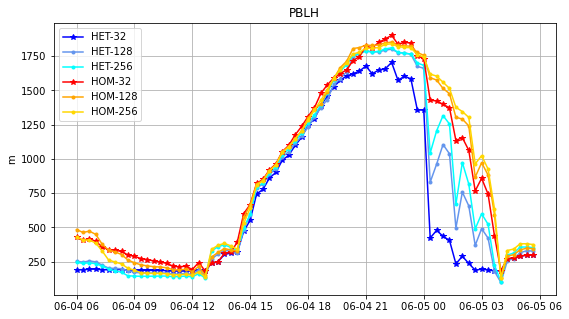

In [213]:
# Plot CLDHGH 
fig, ax1 = plt.subplots(1,1, figsize=(9, 5), 
                     facecolor='w', edgecolor='k')

ax1.plot(times, htg32.PBLH.values[:,0,0],'b-*',  label='HET-32')
ax1.plot(times, htg128.PBLH.values[:,0,0],'.-',  color='cornflowerblue',  label='HET-128')
ax1.plot(times, htg256.PBLH.values[:,0,0],'.-',  color='cyan',            label='HET-256')

ax1.plot(times, hmg32.PBLH.values[:,0,0],'r-*',  label='HOM-32')
ax1.plot(times, hmg128.PBLH.values[:,0,0],'.-', color='orange', label='HOM-128')
ax1.plot(times, hmg256.PBLH.values[:,0,0],'.-', color='gold',   label='HOM-256')

ax1.legend()
#ax1.set_ylim([-0.01,1.0])
ax1.set_title('PBLH')
ax1.set_ylabel('m')
plt.grid()



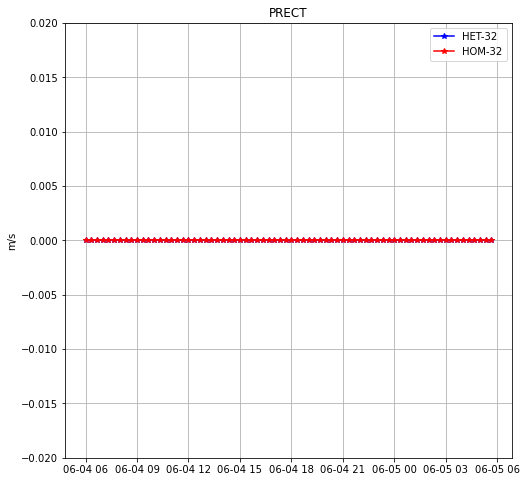

In [137]:
# Plot precipitation 
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), 
                     facecolor='w', edgecolor='k')

ax1.plot(times, htg128.PRECT.values[:,0,0],'b-*',  label='HET-32')
ax1.plot(times, hmg128.PRECT.values[:,0,0],'r-*',  label='HOM-32')

ax1.legend()
ax1.set_ylim([-0.02,0.02])
ax1.set_title('PRECT')
ax1.set_ylabel('m/s')
plt.grid()


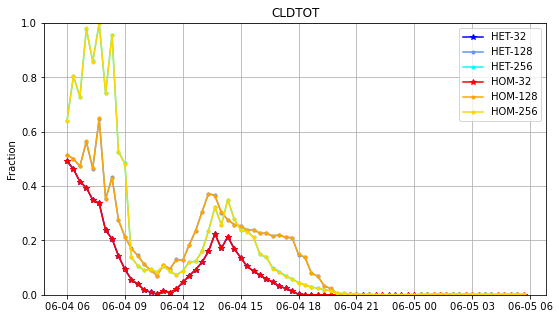

In [148]:
# Plot precipitation 
fig, ax1 = plt.subplots(1,1, figsize=(9, 5), 
                     facecolor='w', edgecolor='k')

ax1.plot(times, htg32.CLDTOT.values[:,0,0],'b-*',  label='HET-32')
ax1.plot(times, htg128.CLDTOT.values[:,0,0],'.-',  color='cornflowerblue',  label='HET-128')
ax1.plot(times, htg256.CLDTOT.values[:,0,0],'.-',  color='cyan',            label='HET-256')

ax1.plot(times, hmg32.CLDTOT.values[:,0,0],'r-*',  label='HOM-32')
ax1.plot(times, hmg128.CLDTOT.values[:,0,0],'.-', color='orange', label='HOM-128')
ax1.plot(times, hmg256.CLDTOT.values[:,0,0],'.-', color='gold',   label='HOM-256')

ax1.legend()
ax1.set_ylim([0,1])
ax1.set_title('CLDTOT')
ax1.set_ylabel('Fraction')
plt.grid()



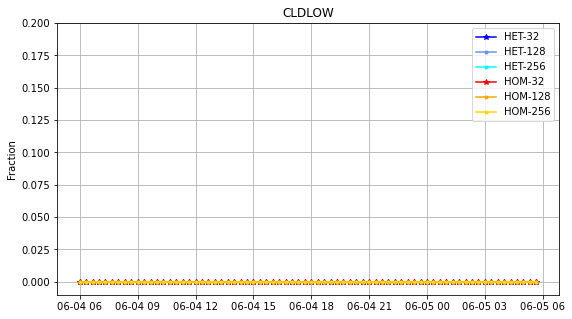

In [152]:
# Plot precipitation 
fig, ax1 = plt.subplots(1,1, figsize=(9, 5), 
                     facecolor='w', edgecolor='k')

ax1.plot(times, htg32.CLDLOW.values[:,0,0],'b-*',  label='HET-32')
ax1.plot(times, htg128.CLDLOW.values[:,0,0],'.-',  color='cornflowerblue',  label='HET-128')
ax1.plot(times, htg256.CLDLOW.values[:,0,0],'.-',  color='cyan',            label='HET-256')

ax1.plot(times, hmg32.CLDLOW.values[:,0,0],'r-*',  label='HOM-32')
ax1.plot(times, hmg128.CLDLOW.values[:,0,0],'.-', color='orange', label='HOM-128')
ax1.plot(times, hmg256.CLDLOW.values[:,0,0],'.-', color='gold',   label='HOM-256')

ax1.legend()
ax1.set_ylim([-0.01,0.2])
ax1.set_title('CLDLOW')
ax1.set_ylabel('Fraction')
plt.grid()




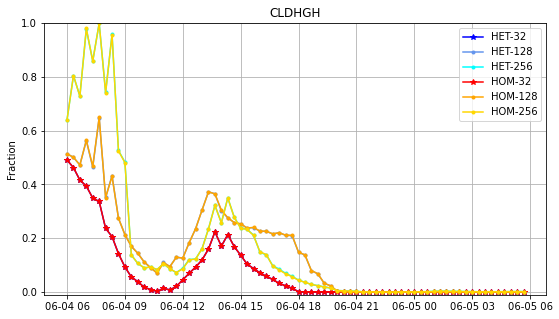

In [155]:
# Plot CLDHGH 
fig, ax1 = plt.subplots(1,1, figsize=(9, 5), 
                     facecolor='w', edgecolor='k')

ax1.plot(times, htg32.CLDHGH.values[:,0,0],'b-*',  label='HET-32')
ax1.plot(times, htg128.CLDHGH.values[:,0,0],'.-',  color='cornflowerblue',  label='HET-128')
ax1.plot(times, htg256.CLDHGH.values[:,0,0],'.-',  color='cyan',            label='HET-256')

ax1.plot(times, hmg32.CLDHGH.values[:,0,0],'r-*',  label='HOM-32')
ax1.plot(times, hmg128.CLDHGH.values[:,0,0],'.-', color='orange', label='HOM-128')
ax1.plot(times, hmg256.CLDHGH.values[:,0,0],'.-', color='gold',   label='HOM-256')

ax1.legend()
ax1.set_ylim([-0.01,1.0])
ax1.set_title('CLDHGH')
ax1.set_ylabel('Fraction')
plt.grid()


In [206]:
# Interpolate Q and U/V to pressure levels 
pnew32  = np.arange(800.0,980.0,25.0)
pnew128 = np.arange(800.0,980.0,5.0)
pnew256 = np.arange(800.0,977.5,2.5)

# ---------------------------------------------------
#   32 levels 
# ---------------------------------------------------
p0mb = htg32.P0.values/100        # mb
# Pull out hya/hyb profiles 
hyam = htg32.hyam.values
hybm = htg32.hybm.values
hyai = htg32.hyai.values
hybi = htg32.hybi.values

# Surface pressure with time dimension
PS_htg = htg32.PS.values              # Pa 
PS_hmg = hmg32.PS.values

Q_htg32      = Ngl.vinth2p(htg32.Q.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)
Q_hmg32      = Ngl.vinth2p(hmg32.Q.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)

relHum_htg32 = Ngl.vinth2p(htg32.RELHUM.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)
relHum_hmg32 = Ngl.vinth2p(hmg32.RELHUM.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)

U_htg32      = Ngl.vinth2p(htg32.U.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)
U_hmg32      = Ngl.vinth2p(hmg32.U.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)

V_htg32      = Ngl.vinth2p(htg32.V.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)
V_hmg32      = Ngl.vinth2p(hmg32.V.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)


# ---------------------------------------------------
#   128 levels 
# ---------------------------------------------------
p0mb = htg128.P0.values/100        # mb
# Pull out hya/hyb profiles 
hyam = htg128.hyam.values
hybm = htg128.hybm.values
hyai = htg128.hyai.values
hybi = htg128.hybi.values

# Surface pressure with time dimension
PS_htg = htg128.PS.values              # Pa 
PS_hmg = hmg128.PS.values

Q_htg128      = Ngl.vinth2p(htg128.Q.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)
Q_hmg128      = Ngl.vinth2p(hmg128.Q.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)

relHum_htg128 = Ngl.vinth2p(htg128.RELHUM.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)
relHum_hmg128 = Ngl.vinth2p(hmg128.RELHUM.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)

U_htg128      = Ngl.vinth2p(htg128.U.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)
U_hmg128      = Ngl.vinth2p(hmg128.U.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)

V_htg128      = Ngl.vinth2p(htg128.V.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)
V_hmg128      = Ngl.vinth2p(hmg128.V.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)


# ---------------------------------------------------
#   256 levels 
# ---------------------------------------------------
p0mb = htg256.P0.values/100        # mb
# Pull out hya/hyb profiles 
hyam = htg256.hyam.values
hybm = htg256.hybm.values
hyai = htg256.hyai.values
hybi = htg256.hybi.values

# Surface pressure with time dimension
PS_htg = htg256.PS.values              # Pa 
PS_hmg = hmg256.PS.values

Q_htg256      = Ngl.vinth2p(htg256.Q.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)
Q_hmg256      = Ngl.vinth2p(hmg256.Q.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)

relHum_htg256 = Ngl.vinth2p(htg256.RELHUM.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)
relHum_hmg256 = Ngl.vinth2p(hmg256.RELHUM.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)

U_htg256      = Ngl.vinth2p(htg256.U.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)
U_hmg256      = Ngl.vinth2p(hmg256.U.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)

V_htg256      = Ngl.vinth2p(htg256.V.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)
V_hmg256      = Ngl.vinth2p(hmg256.V.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)


In [182]:
np.shape(htg32.RELHUM)

(72, 32, 1, 1)

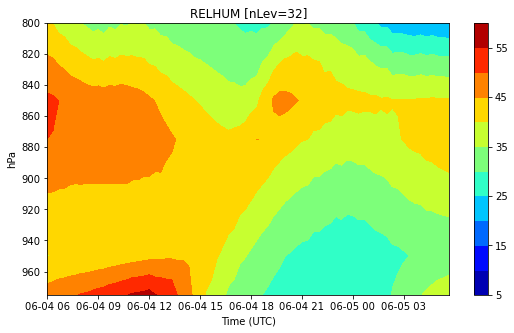

In [199]:
# Now plot time evolution of humidity
fig, ax1 = plt.subplots(1,1, figsize=(9, 5), 
                     facecolor='w', edgecolor='k')

cLevs = np.arange(5,65,5)

pmesh = ax1.contourf(times,pnew32,np.transpose(relHum_htg32[:,:,0,0]), cLevs,
                      cmap='jet')

ax1.set_ylabel('hPa')
ax1.set_xlabel('Time (UTC)')
ax1.set_title('RELHUM [nLev=32]')

fig.colorbar(pmesh)
plt.gca().invert_yaxis()




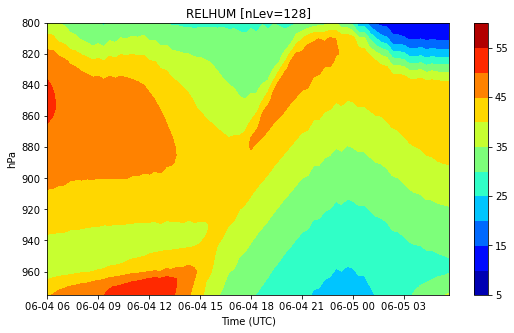

In [198]:
# Now plot time evolution of humidity
fig, ax1 = plt.subplots(1,1, figsize=(9, 5), 
                     facecolor='w', edgecolor='k')

cLevs = np.arange(5,65,5)
pmesh = ax1.contourf(times,pnew128,np.transpose(relHum_htg128[:,:,0,0]), cLevs,
                      cmap='jet')

ax1.set_ylabel('hPa')
ax1.set_xlabel('Time (UTC)')
ax1.set_title('RELHUM [nLev=128]')

cbar = fig.colorbar(pmesh)
plt.gca().invert_yaxis()


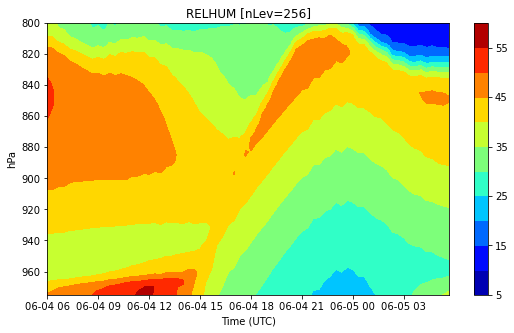

In [200]:
# Now plot time evolution of humidity
fig, ax1 = plt.subplots(1,1, figsize=(9, 5), 
                     facecolor='w', edgecolor='k')

cLevs = np.arange(5,65,5)
pmesh = ax1.contourf(times,pnew256,np.transpose(relHum_htg256[:,:,0,0]), cLevs,
                      cmap='jet')

ax1.set_ylabel('hPa')
ax1.set_xlabel('Time (UTC)')
ax1.set_title('RELHUM [nLev=256]')

cbar = fig.colorbar(pmesh)
plt.gca().invert_yaxis()



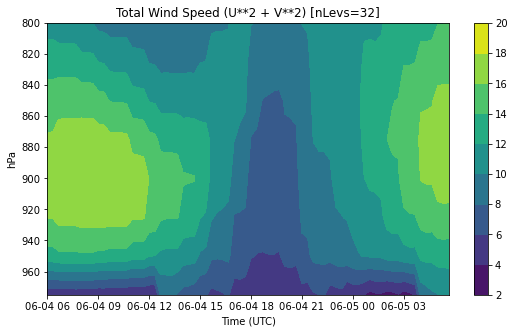

In [208]:
# Now plot time evolution of wind speed 

windSpeed = np.sqrt((U_htg32**2) + (V_htg32**2))

fig, ax1 = plt.subplots(1,1, figsize=(9, 5), 
                     facecolor='w', edgecolor='k')

cLevs = np.arange(2,22,2)
pmesh = ax1.contourf(times,pnew32,np.transpose(windSpeed[:,:,0,0]), cLevs,
                     cmap='viridis')

ax1.set_ylabel('hPa')
ax1.set_xlabel('Time (UTC)')
ax1.set_title('Total Wind Speed (U**2 + V**2) [nLevs=32]')

fig.colorbar(pmesh)
plt.gca().invert_yaxis()



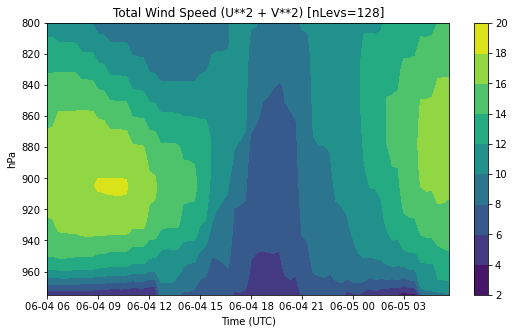

In [209]:
# Now plot time evolution of wind speed 

windSpeed128 = np.sqrt((U_htg128**2) + (V_htg128**2))

fig, ax1 = plt.subplots(1,1, figsize=(9, 5), 
                     facecolor='w', edgecolor='k')

cLevs = np.arange(2,22,2)
pmesh = ax1.contourf(times,pnew128,np.transpose(windSpeed128[:,:,0,0]), cLevs,
                     cmap='viridis')

ax1.set_ylabel('hPa')
ax1.set_xlabel('Time (UTC)')
ax1.set_title('Total Wind Speed (U**2 + V**2) [nLevs=128]')

fig.colorbar(pmesh)
plt.gca().invert_yaxis()




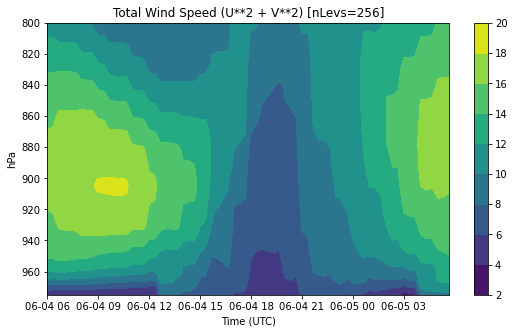

In [210]:
# Now plot time evolution of wind speed 

windSpeed256 = np.sqrt((U_htg256**2) + (V_htg256**2))

fig, ax1 = plt.subplots(1,1, figsize=(9, 5), 
                     facecolor='w', edgecolor='k')

cLevs = np.arange(2,22,2)
pmesh = ax1.contourf(times,pnew256,np.transpose(windSpeed256[:,:,0,0]), cLevs,
                     cmap='viridis')

ax1.set_ylabel('hPa')
ax1.set_xlabel('Time (UTC)')
ax1.set_title('Total Wind Speed (U**2 + V**2) [nLevs=256]')

fig.colorbar(pmesh)
plt.gca().invert_yaxis()





### Interpolate to some levels 

In [90]:
# Get date Meng used: 4 June 2015, average of 14-16 UTC (morning, 8a-10a)

timeSel = np.where((times.day==4) & (times.hour>=14) & (times.hour<16))[0]

hmg32_sel  = hmg32.isel(time=timeSel)
hmg128_sel = hmg128.isel(time=timeSel)
hmg256_sel = hmg256.isel(time=timeSel)

htg32_sel  = htg32.isel(time=timeSel)
htg128_sel = htg128.isel(time=timeSel)
htg256_sel = htg256.isel(time=timeSel)


In [91]:
print('256 levels: ', htg256.lev.values)
print('\n\n')
print('128 levels: ', htg128.lev.values)
print('\n\n')
print('32 levels: ', htg32.lev.values)

256 levels:  [  2.4287678    2.77582434   3.12288088   3.46993742   3.81699397
   4.16405051   4.51110705   4.85816359   5.35208284   5.99286478
   6.63364673   7.27442867   7.91521062   8.55599256   9.19677451
   9.83755646  10.68278303  11.73245424  12.78212544  13.83179665
  14.88146785  15.93113906  16.98081027  18.03048147  19.31242994
  20.82665567  22.34088141  23.85510714  25.25252695  26.53314085
  27.81375475  29.09436865  30.5082474   32.055391    33.60253461
  35.14967822  36.34196892  37.17940673  38.01684454  38.85428235
  39.76309486  40.74328206  41.72346927  42.70365648  43.68384369
  44.66403089  45.6442181   46.62440531  47.68487392  48.82562393
  49.96637395  51.10712396  52.24787397  53.38862399  54.529374
  55.67012401  56.90049892  58.22049873  59.54049854  60.86049834
  62.18049815  63.50049796  64.82049776  66.14049757  67.66930502
  69.40692011  71.14453521  72.8821503   74.61976539  76.35738049
  78.09499558  79.83261067  81.59139473  83.37134775  85.15130077

In [92]:
# New pressure levels in hPa 
pnew32  = np.arange(800.0,980.0,25.0)

pnew128 = np.arange(800.0,980.0,5.0)

pnew256 = np.arange(800.0,977.5,2.5)


In [93]:
# ---------------------------------------------------
#   32 levels 
# ---------------------------------------------------
p0mb = htg32_sel.P0.values/100        # mb
# Pull out hya/hyb profiles 
hyam = htg32_sel.hyam.values
hybm = htg32_sel.hybm.values
hyai = htg32_sel.hyai.values
hybi = htg32_sel.hybi.values

# Surface pressure with time dimension
PS_htg   = htg32_sel.PS.values              # Pa 
PS_hmg   = hmg32_sel.PS.values              # Pa

# Converting HTG variables: 
THLP2_htg32  = Ngl.vinth2p(htg32_sel.THLP2_CLUBB.values,hyai,hybi,pnew32,PS,1,p0mb,1,True)
WPTHLP_htg32 = Ngl.vinth2p(htg32_sel.WPTHLP_CLUBB.values,hyai,hybi,pnew32,PS,1,p0mb,1,True)
UP2_htg32    = Ngl.vinth2p(htg32_sel.UP2_CLUBB.values,hyai,hybi,pnew32,PS,1,p0mb,1,True)
WP2_htg32    = Ngl.vinth2p(htg32_sel.WP2_CLUBB.values,hyai,hybi,pnew32,PS,1,p0mb,1,True)
WP3_htg32    = Ngl.vinth2p(htg32_sel.WP3_CLUBB.values,hyai,hybi,pnew32,PS,1,p0mb,1,True)
WPTHVP_htg32 = Ngl.vinth2p(htg32_sel.WPTHVP_CLUBB.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)
WSUB_htg32   = Ngl.vinth2p(htg32_sel.WSUB.values ,hyam,hybm,pnew32,PS,1,p0mb,1,True)
T_htg32      = Ngl.vinth2p(htg32_sel.T.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)
Q_htg32      = Ngl.vinth2p(htg32_sel.Q.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)
OMEGA_htg32  = Ngl.vinth2p(htg32_sel.OMEGA.values ,hyam,hybm,pnew32,PS,1,p0mb,1,True)
THETAL_htg32 = Ngl.vinth2p(htg32_sel.THETAL.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)

# Converting HMG variables: 
THLP2_hmg32  = Ngl.vinth2p(hmg32_sel.THLP2_CLUBB.values,hyai,hybi,pnew32,PS,1,p0mb,1,True)
WPTHLP_hmg32 = Ngl.vinth2p(hmg32_sel.WPTHLP_CLUBB.values,hyai,hybi,pnew32,PS,1,p0mb,1,True)
UP2_hmg32    = Ngl.vinth2p(hmg32_sel.UP2_CLUBB.values,hyai,hybi,pnew32,PS,1,p0mb,1,True)
WP2_hmg32    = Ngl.vinth2p(hmg32_sel.WP2_CLUBB.values,hyai,hybi,pnew32,PS,1,p0mb,1,True)
WP3_hmg32    = Ngl.vinth2p(hmg32_sel.WP3_CLUBB.values,hyai,hybi,pnew32,PS,1,p0mb,1,True)
WPTHVP_hmg32 = Ngl.vinth2p(hmg32_sel.WPTHVP_CLUBB.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)
WSUB_hmg32   = Ngl.vinth2p(hmg32_sel.WSUB.values ,hyam,hybm,pnew32,PS,1,p0mb,1,True)
T_hmg32      = Ngl.vinth2p(hmg32_sel.T.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)
Q_hmg32      = Ngl.vinth2p(hmg32_sel.Q.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)
OMEGA_hmg32  = Ngl.vinth2p(hmg32_sel.OMEGA.values ,hyam,hybm,pnew32,PS,1,p0mb,1,True)
THETAL_hmg32 = Ngl.vinth2p(hmg32_sel.THETAL.values,hyam,hybm,pnew32,PS,1,p0mb,1,True)


In [94]:
# ---------------------------------------------------
#   128 levels 
# ---------------------------------------------------
p0mb = htg128_sel.P0.values/100        # mb
# Pull out hya/hyb profiles 
hyam = htg128_sel.hyam.values
hybm = htg128_sel.hybm.values
hyai = htg128_sel.hyai.values
hybi = htg128_sel.hybi.values

# Surface pressure with time dimension
PS_htg   = htg128_sel.PS.values              # Pa 
PS_hmg   = hmg128_sel.PS.values              # Pa

# Converting HTG variables: 
THLP2_htg128  = Ngl.vinth2p(htg128_sel.THLP2_CLUBB.values,hyai,hybi,pnew128,PS,1,p0mb,1,True)
WPTHLP_htg128 = Ngl.vinth2p(htg128_sel.WPTHLP_CLUBB.values,hyai,hybi,pnew128,PS,1,p0mb,1,True)
UP2_htg128    = Ngl.vinth2p(htg128_sel.UP2_CLUBB.values,hyai,hybi,pnew128,PS,1,p0mb,1,True)
WP2_htg128    = Ngl.vinth2p(htg128_sel.WP2_CLUBB.values,hyai,hybi,pnew128,PS,1,p0mb,1,True)
WP3_htg128    = Ngl.vinth2p(htg128_sel.WP3_CLUBB.values,hyai,hybi,pnew128,PS,1,p0mb,1,True)
WPTHVP_htg128 = Ngl.vinth2p(htg128_sel.WPTHVP_CLUBB.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)
WSUB_htg128   = Ngl.vinth2p(htg128_sel.WSUB.values ,hyam,hybm,pnew128,PS,1,p0mb,1,True)
T_htg128      = Ngl.vinth2p(htg128_sel.T.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)
Q_htg128      = Ngl.vinth2p(htg128_sel.Q.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)
OMEGA_htg128  = Ngl.vinth2p(htg128_sel.OMEGA.values ,hyam,hybm,pnew128,PS,1,p0mb,1,True)
THETAL_htg128 = Ngl.vinth2p(htg128_sel.THETAL.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)

# Converting HMG variables: 
THLP2_hmg128  = Ngl.vinth2p(hmg128_sel.THLP2_CLUBB.values,hyai,hybi,pnew128,PS,1,p0mb,1,True)
WPTHLP_hmg128 = Ngl.vinth2p(hmg128_sel.WPTHLP_CLUBB.values,hyai,hybi,pnew128,PS,1,p0mb,1,True)
UP2_hmg128    = Ngl.vinth2p(hmg128_sel.UP2_CLUBB.values,hyai,hybi,pnew128,PS,1,p0mb,1,True)
WP2_hmg128    = Ngl.vinth2p(hmg128_sel.WP2_CLUBB.values,hyai,hybi,pnew128,PS,1,p0mb,1,True)
WP3_hmg128    = Ngl.vinth2p(hmg128_sel.WP3_CLUBB.values,hyai,hybi,pnew128,PS,1,p0mb,1,True)
WPTHVP_hmg128 = Ngl.vinth2p(hmg128_sel.WPTHVP_CLUBB.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)
WSUB_hmg128   = Ngl.vinth2p(hmg128_sel.WSUB.values ,hyam,hybm,pnew128,PS,1,p0mb,1,True)
T_hmg128      = Ngl.vinth2p(hmg128_sel.T.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)
Q_hmg128      = Ngl.vinth2p(hmg128_sel.Q.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)
OMEGA_hmg128  = Ngl.vinth2p(hmg128_sel.OMEGA.values ,hyam,hybm,pnew128,PS,1,p0mb,1,True)
THETAL_hmg128 = Ngl.vinth2p(hmg128_sel.THETAL.values,hyam,hybm,pnew128,PS,1,p0mb,1,True)


In [95]:
# ---------------------------------------------------
#   256 levels 
# ---------------------------------------------------
p0mb = htg256_sel.P0.values/100        # mb
# Pull out hya/hyb profiles 
hyam = htg256_sel.hyam.values
hybm = htg256_sel.hybm.values
hyai = htg256_sel.hyai.values
hybi = htg256_sel.hybi.values

# Surface pressure with time dimension
PS_htg   = htg256_sel.PS.values              # Pa 
PS_hmg   = hmg256_sel.PS.values              # Pa

# Converting HTG variables: 
THLP2_htg256  = Ngl.vinth2p(htg256_sel.THLP2_CLUBB.values,hyai,hybi,pnew256,PS,1,p0mb,1,True)
WPTHLP_htg256 = Ngl.vinth2p(htg256_sel.WPTHLP_CLUBB.values,hyai,hybi,pnew256,PS,1,p0mb,1,True)
UP2_htg256    = Ngl.vinth2p(htg256_sel.UP2_CLUBB.values,hyai,hybi,pnew256,PS,1,p0mb,1,True)
WP2_htg256    = Ngl.vinth2p(htg256_sel.WP2_CLUBB.values,hyai,hybi,pnew256,PS,1,p0mb,1,True)
WP3_htg256    = Ngl.vinth2p(htg256_sel.WP3_CLUBB.values,hyai,hybi,pnew256,PS,1,p0mb,1,True)
WPTHVP_htg256 = Ngl.vinth2p(htg256_sel.WPTHVP_CLUBB.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)
WSUB_htg256   = Ngl.vinth2p(htg256_sel.WSUB.values ,hyam,hybm,pnew256,PS,1,p0mb,1,True)
T_htg256      = Ngl.vinth2p(htg256_sel.T.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)
Q_htg256      = Ngl.vinth2p(htg256_sel.Q.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)
OMEGA_htg256  = Ngl.vinth2p(htg256_sel.OMEGA.values ,hyam,hybm,pnew256,PS,1,p0mb,1,True)
THETAL_htg256 = Ngl.vinth2p(htg256_sel.THETAL.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)

# Converting HMG variables: 
THLP2_hmg256  = Ngl.vinth2p(hmg256_sel.THLP2_CLUBB.values,hyai,hybi,pnew256,PS,1,p0mb,1,True)
WPTHLP_hmg256 = Ngl.vinth2p(hmg256_sel.WPTHLP_CLUBB.values,hyai,hybi,pnew256,PS,1,p0mb,1,True)
UP2_hmg256    = Ngl.vinth2p(hmg256_sel.UP2_CLUBB.values,hyai,hybi,pnew256,PS,1,p0mb,1,True)
WP2_hmg256    = Ngl.vinth2p(hmg256_sel.WP2_CLUBB.values,hyai,hybi,pnew256,PS,1,p0mb,1,True)
WP3_hmg256    = Ngl.vinth2p(hmg256_sel.WP3_CLUBB.values,hyai,hybi,pnew256,PS,1,p0mb,1,True)
WPTHVP_hmg256 = Ngl.vinth2p(hmg256_sel.WPTHVP_CLUBB.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)
WSUB_hmg256   = Ngl.vinth2p(hmg256_sel.WSUB.values ,hyam,hybm,pnew256,PS,1,p0mb,1,True)
T_hmg256      = Ngl.vinth2p(hmg256_sel.T.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)
Q_hmg256      = Ngl.vinth2p(hmg256_sel.Q.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)
OMEGA_hmg256  = Ngl.vinth2p(hmg256_sel.OMEGA.values ,hyam,hybm,pnew256,PS,1,p0mb,1,True)
THETAL_hmg256 = Ngl.vinth2p(hmg256_sel.THETAL.values,hyam,hybm,pnew256,PS,1,p0mb,1,True)


### Plot vertical profiles

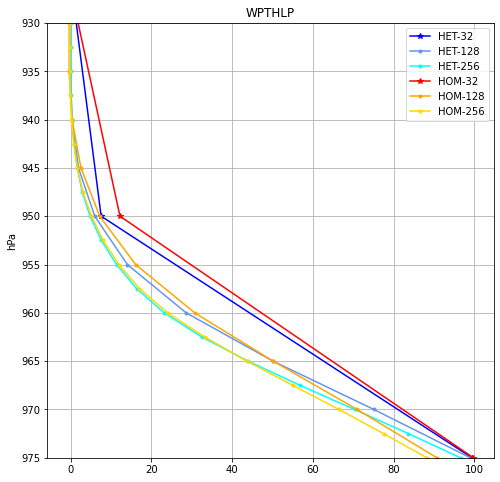

In [121]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(WPTHLP_htg32),axis=0),pnew32,'b-*',  label='HET-32')
ax1.plot(np.nanmean(np.squeeze(WPTHLP_htg128),axis=0),pnew128,'.-',color='cornflowerblue',label='HET-128')
ax1.plot(np.nanmean(np.squeeze(WPTHLP_htg256),axis=0),pnew256,'.-',color='cyan',label='HET-256')

ax1.plot(np.nanmean(np.squeeze(WPTHLP_hmg32),axis=0),pnew32,'-*',color='red',label='HOM-32')
ax1.plot(np.nanmean(np.squeeze(WPTHLP_hmg128),axis=0),pnew128,'.-',color='orange',label='HOM-128')
ax1.plot(np.nanmean(np.squeeze(WPTHLP_hmg256),axis=0),pnew256,'.-',color='gold',label='HOM-256')

ax1.legend()
ax1.set_ylim([930,975])
#ax1.set_xlim([-0.05,0.8])
ax1.set_title('WPTHLP')
ax1.set_ylabel('hPa')

plt.gca().invert_yaxis()
plt.grid()

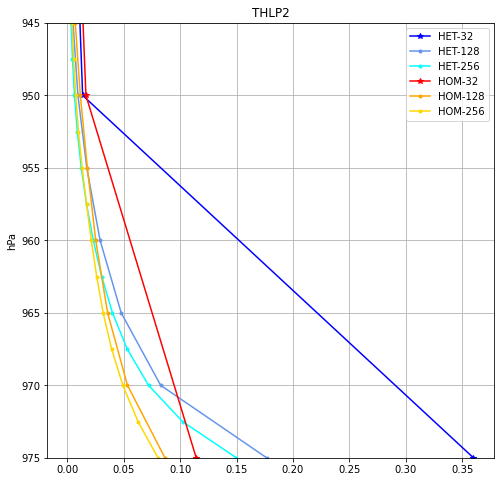

In [122]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(THLP2_htg32),axis=0),pnew32,'b-*',                        label='HET-32')
ax1.plot(np.nanmean(np.squeeze(THLP2_htg128),axis=0),pnew128,'.-',color='cornflowerblue',label='HET-128')
ax1.plot(np.nanmean(np.squeeze(THLP2_htg256),axis=0),pnew256,'.-',color='cyan',          label='HET-256')

ax1.plot(np.nanmean(np.squeeze(THLP2_hmg32),axis=0),pnew32,'r-*',                label='HOM-32')
ax1.plot(np.nanmean(np.squeeze(THLP2_hmg128),axis=0),pnew128,'.-',color='orange',label='HOM-128')
ax1.plot(np.nanmean(np.squeeze(THLP2_hmg256),axis=0),pnew256,'.-',color='gold',  label='HOM-256')

ax1.legend()
ax1.set_ylim([945,975])
#ax1.set_xlim([-0.05,0.8])
ax1.set_title('THLP2')
ax1.set_ylabel('hPa')

plt.gca().invert_yaxis()
plt.grid()


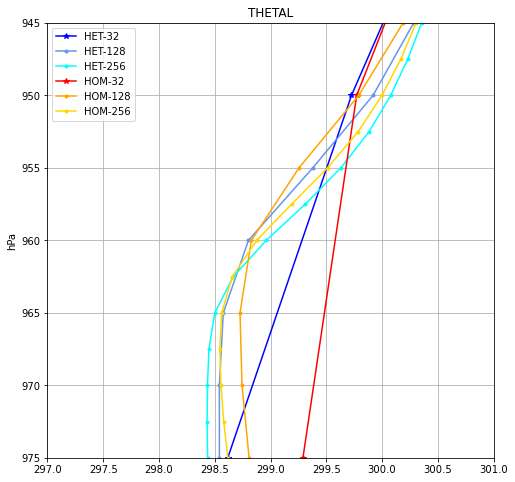

In [123]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(THETAL_htg32),axis=0),pnew32,'b-*',                        label='HET-32')
ax1.plot(np.nanmean(np.squeeze(THETAL_htg128),axis=0),pnew128,'.-',color='cornflowerblue',label='HET-128')
ax1.plot(np.nanmean(np.squeeze(THETAL_htg256),axis=0),pnew256,'.-',color='cyan',          label='HET-256')

ax1.plot(np.nanmean(np.squeeze(THETAL_hmg32),axis=0),pnew32,'r-*',                label='HOM-32')
ax1.plot(np.nanmean(np.squeeze(THETAL_hmg128),axis=0),pnew128,'.-',color='orange',label='HOM-128')
ax1.plot(np.nanmean(np.squeeze(THETAL_hmg256),axis=0),pnew256,'.-',color='gold',  label='HOM-256')

ax1.legend()
ax1.set_ylim([945,975])
ax1.set_xlim([297,301])
ax1.set_title('THETAL')
ax1.set_ylabel('hPa')

plt.gca().invert_yaxis()
plt.grid()


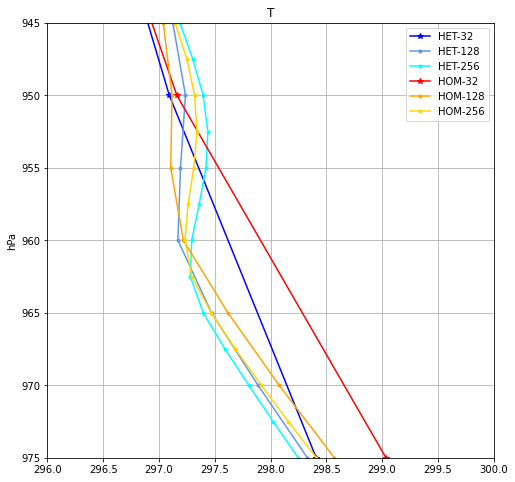

In [124]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(T_htg32),axis=0),pnew32,'b-*',                        label='HET-32')
ax1.plot(np.nanmean(np.squeeze(T_htg128),axis=0),pnew128,'.-',color='cornflowerblue',label='HET-128')
ax1.plot(np.nanmean(np.squeeze(T_htg256),axis=0),pnew256,'.-',color='cyan',          label='HET-256')

ax1.plot(np.nanmean(np.squeeze(T_hmg32),axis=0),pnew32,'r-*',label='HOM-32')
ax1.plot(np.nanmean(np.squeeze(T_hmg128),axis=0),pnew128,'.-',color='orange',label='HOM-128')
ax1.plot(np.nanmean(np.squeeze(T_hmg256),axis=0),pnew256,'.-',color='gold',label='HOM-256')

ax1.legend()
ax1.set_ylim([945,975])
ax1.set_xlim([296,300])
ax1.set_title('T')
ax1.set_ylabel('hPa')

plt.gca().invert_yaxis()
plt.grid()


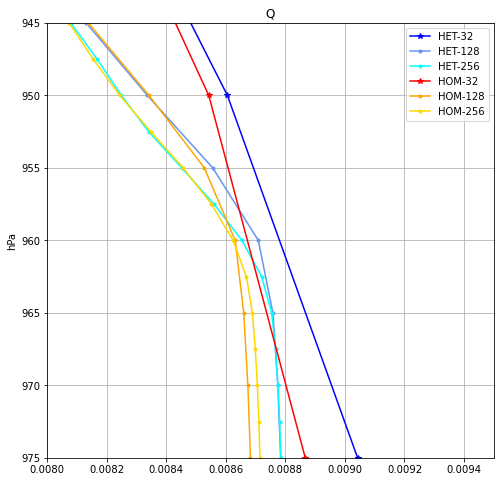

In [125]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(Q_htg32),axis=0),pnew32,'b-*',  label='HET-32')
ax1.plot(np.nanmean(np.squeeze(Q_htg128),axis=0),pnew128,'.-',color='cornflowerblue',label='HET-128')
ax1.plot(np.nanmean(np.squeeze(Q_htg256),axis=0),pnew256,'.-',color='cyan',label='HET-256')

ax1.plot(np.nanmean(np.squeeze(Q_hmg32),axis=0),pnew32,'r-*',label='HOM-32')
ax1.plot(np.nanmean(np.squeeze(Q_hmg128),axis=0),pnew128,'.-',color='orange',label='HOM-128')
ax1.plot(np.nanmean(np.squeeze(Q_hmg256),axis=0),pnew256,'.-',color='gold',label='HOM-256')

ax1.legend()
ax1.set_ylim([945,975])
ax1.set_xlim([0.008,0.0095])
ax1.set_title('Q')
ax1.set_ylabel('hPa')

plt.gca().invert_yaxis()
plt.grid()


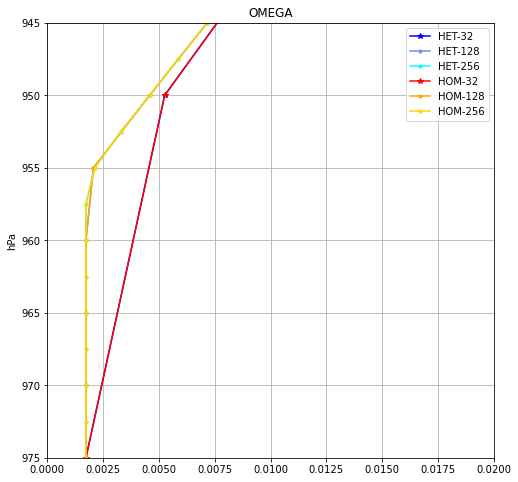

In [126]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(OMEGA_htg32),axis=0),pnew32,'b-*',  label='HET-32')
ax1.plot(np.nanmean(np.squeeze(OMEGA_htg128),axis=0),pnew128,'.-',color='cornflowerblue',label='HET-128')
ax1.plot(np.nanmean(np.squeeze(OMEGA_htg256),axis=0),pnew256,'.-',color='cyan',label='HET-256')

ax1.plot(np.nanmean(np.squeeze(OMEGA_hmg32),axis=0),pnew32,'r-*',label='HOM-32')
ax1.plot(np.nanmean(np.squeeze(OMEGA_hmg128),axis=0),pnew128,'.-',color='orange',label='HOM-128')
ax1.plot(np.nanmean(np.squeeze(OMEGA_hmg256),axis=0),pnew256,'.-',color='gold',label='HOM-256')

ax1.legend()
ax1.set_ylim([945,975])
ax1.set_xlim([0,0.02])
ax1.set_title('OMEGA')
ax1.set_ylabel('hPa')

plt.gca().invert_yaxis()
plt.grid()


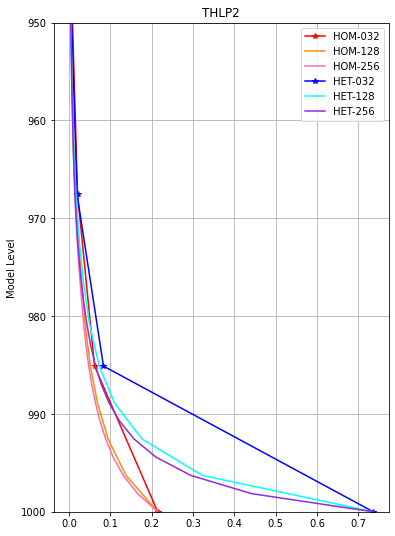

In [74]:
fig, ax1 = plt.subplots(1,1, figsize=(6, 9), 
                     facecolor='w', edgecolor='k')

ax1.plot(np.nanmean(np.squeeze(hmg32_sel.THLP2_CLUBB.values),axis=0),hmg32_sel.ilev.values,'r-*',label='HOM-032')
ax1.plot(np.nanmean(np.squeeze(hmg128_sel.THLP2_CLUBB.values),axis=0),hmg128_sel.ilev.values,'-',color='darkorange',label='HOM-128')
ax1.plot(np.nanmean(np.squeeze(hmg256_sel.THLP2_CLUBB.values),axis=0),hmg256_sel.ilev.values,'-',color='hotpink',label='HOM-256')

ax1.plot(np.nanmean(np.squeeze(htg32_sel.THLP2_CLUBB.values),axis=0),htg32_sel.ilev.values,'b-*',label='HET-032')
ax1.plot(np.nanmean(np.squeeze(htg128_sel.THLP2_CLUBB.values),axis=0),htg128_sel.ilev.values,'-',color='cyan',label='HET-128')
ax1.plot(np.nanmean(np.squeeze(htg256_sel.THLP2_CLUBB.values),axis=0),htg256_sel.ilev.values,'-',color='blueviolet',label='HET-256')



ax1.legend()
ax1.set_ylim([950,1000])
#ax1.set_xlim([-0.05,0.8])
ax1.set_title('THLP2')
ax1.set_ylabel('Model Level')

plt.gca().invert_yaxis()
plt.grid()